# <a name="top"> <p>CIFAR 100 Practice<br /></a>
<strong>Redes Neuronales y Aprendizaje Profundo</strong><br />
<strong>Master Universitario en Ciencia de Datos</strong></p>

<p>&nbsp;</p>

<p style="text-align:right">V&iacute;ctor Viloria V&aacute;zquez (<em>victor.viloria@cunef.edu</em>)</p>

<hr style="border:1px solid gray">

## Estructura


[Introducción](#introduccion) 

[1. Importación de librerias](#importacion) 
    
[2. Definición de sets y labels](#definicion)

[3. Pruebas de modelos](#pruebas)

[4. Comparativa según batch size y número de neuronas](#comparacion)

   - [Comparación score vs batch size](#batch)
   - [Comparación score vs nº de neuronas](#neuronas)
   
[5. Comparación de modelos](#modelos) 
- [Random Forest](#random)
- [Otro modelo a elegir de Machine Learning: Arboles de decisión](#arboles)
- [Una red neuronal](#red)
- [Random forest sobre el histograma del LBP (Extra)](#randomlbp)
- [Una red neuronal sobre el histograma del LBP (Extra)](#redlbp)

[6. Conclusiones Generales](#conclusiones) 
    

<hr style="border:1px solid gray">

##  <a name="introduccion"> Introducción  </a>

En esta práctica realizaremos **diferentes pruebas de redes neuronales**. Una vez modeladas 8 redes neuronales de diferentes características , nos quedaremos con aquella que **mejor resultado** haya conseguido en el **set de validación**.

Posteriormente estudiaremos como afecta el score a la **variación del tamaño de batch size y a la del número de neuronas en cada capa**, representando graficamente los resultados.

Finalmente realizaremos una **comparación entre diferentes modelos de Machine Learning y los scores resultantes de cada uno**.

##  <a name="importacion"> 1. Importación de librerias  </a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, Input, regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import AUC
from tensorflow.keras.losses import SparseCategoricalCrossentropy, MSE, MAE
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from aux_func import show_history
import ssl # Para poder cargar la base de datos de CEFAR 100
ssl._create_default_https_context = ssl._create_unverified_context
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, precision_score
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier #Librería de árboles de decisión
import warnings
warnings.filterwarnings("ignore")


##  <a name="definicion">  2. Definición de sets y labels </a>


Definimos el set de training y el set de validación para trabajar con ellos.



In [4]:
(X_train, y_train), (X_validation, y_validation) = cifar100.load_data() #Cargamos el cifar 100 y separamos los tipos
X_train = X_train/255  #Normalizamos los valores
X_validation = X_validation/255

Definimos las diferentes clases de imagenes y comprobamos que se hayan cargado correctamente

Número de elementos en el dataset =  60000


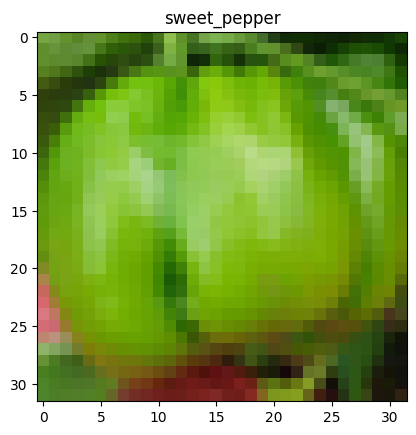

In [5]:
labels = ["apple","aquarium_fish","baby","bear","beaver","bed","bee","beetle","bicycle","bottle","bowl","boy","bridge","bus","butterfly","camel","can","castle","caterpillar","cattle","chair","chimpanzee","clock","cloud","cockroach","couch","crab","crocodile","cup","dinosaur","dolphin","elephant","flatfish","forest","fox","girl","hamster","house","kangaroo","keyboard","lamp","lawn_mower","leopard","lion","lizard","lobster","man","maple_tree","motorcycle","mountain","mouse","mushroom","oak_tree","orange","orchid","otter","palm_tree","pear","pickup_truck","pine_tree","plain","plate","poppy","porcupine","possum","rabbit","raccoon","ray","road","rocket","rose","sea","seal","shark","shrew","skunk","skyscraper","snail","snake","spider","squirrel","streetcar","sunflower","sweet_pepper","table","tank","telephone","television","tiger","tractor","train","trout","tulip","turtle","wardrobe","whale","willow_tree","wolf","woman","worm"]
print('Número de elementos en el dataset = ',X_train.shape[0]+X_validation.shape[0])
plt.title(labels[int(y_train[66])])
plt.imshow(X_train[66])
plt.show()


##  <a name="pruebas"> 3. Pruebas de modelos  <a>

Procedemos a modelar diferentes redes neuronales **variando sus carecterísticas (capas, nº de neuronas, activador, batch size...) y representando su score gráficamente**. Tendremos en cuenta para el siguiente apartado el modelo que mejor resultado haya obtenido.

### Intento 1 (3 capas, batch_size=100, epochs=10)

In [11]:
# capas de la red
input = Input(shape=(32,32,3)) #Según tamaño de la imagen y formato rgb
input_flat = layers.Flatten()(input)
layer = layers.Dense(units=100, activation='sigmoid')(input_flat)
layer = layers.Dense(units=50, activation='sigmoid')(layer)
layer = layers.Dense(units=20, activation='sigmoid')(layer)
output = layers.Dense(units=100, activation='softmax')(layer)

# creamos el modelo
model = Model(inputs=input, outputs=output)
print(model.summary())

# optimizador
optimizer = SGD(learning_rate=0.01)

# función loss
loss = SparseCategoricalCrossentropy(from_logits=False) #lo usamos porq es clasificacion

# métrica
metrics = ['accuracy']

# compilamos el modelo
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 100)               307300    
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 20)                1020      
                                                                 
 dense_3 (Dense)             (None, 100)               2100      
                                                                 
Total params: 315,470
Trainable params: 315,470
Non-trainable

In [22]:
history1 = model.fit(x=X_train, y=y_train, batch_size=100, epochs=10,
                           validation_data=(X_validation, y_validation))

Epoch 1/10
500/500 [==============================] - 4s 9ms/step - loss: 4.6050 - accuracy: 0.0098 - val_loss: 4.6048 - val_accuracy: 0.0106
Epoch 2/10
500/500 [==============================] - 3s 7ms/step - loss: 4.6049 - accuracy: 0.0119 - val_loss: 4.6046 - val_accuracy: 0.0134
Epoch 3/10
500/500 [==============================] - 3s 6ms/step - loss: 4.6047 - accuracy: 0.0129 - val_loss: 4.6045 - val_accuracy: 0.0140
Epoch 4/10
500/500 [==============================] - 3s 6ms/step - loss: 4.6046 - accuracy: 0.0119 - val_loss: 4.6044 - val_accuracy: 0.0143
Epoch 5/10
500/500 [==============================] - 3s 6ms/step - loss: 4.6045 - accuracy: 0.0151 - val_loss: 4.6043 - val_accuracy: 0.0148
Epoch 6/10
500/500 [==============================] - 3s 6ms/step - loss: 4.6044 - accuracy: 0.0161 - val_loss: 4.6042 - val_accuracy: 0.0154
Epoch 7/10
500/500 [==============================] - 3s 7ms/step - loss: 4.6043 - accuracy: 0.0162 - val_loss: 4.6042 - val_accuracy: 0.0162
Epoch 

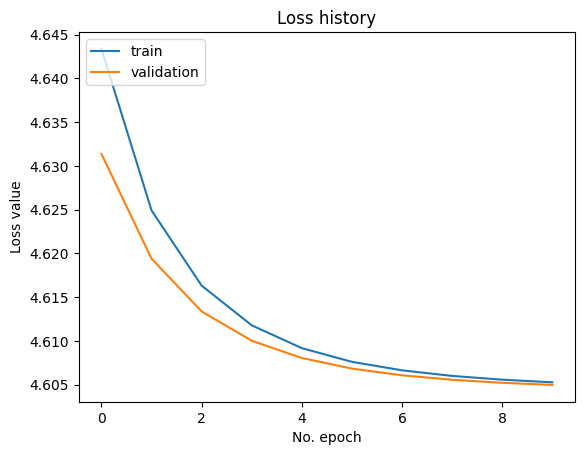

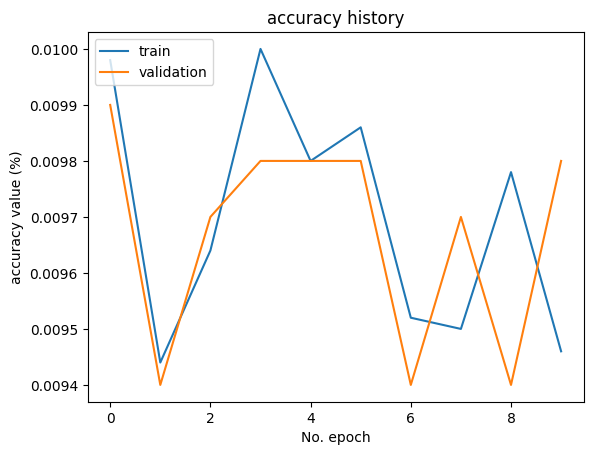

In [19]:
show_history(history1)

Observamos un accuracy en el set de validation de **1.78%** y como por cada epoch que va recorriendo el loss value disminuye, mientras que la accuracy varía ascendente y descendentemente de una forma notable.

### Intento 2  (3 capas, batch_size=100, epochs=10, todos activadores sigmoid) 

In [23]:
# capas de la red
input = Input(shape=(32,32,3)) #Según tamaño de la imagen y formato rgb
input_flat = layers.Flatten()(input)
layer = layers.Dense(units=100, activation='sigmoid')(input_flat)
layer = layers.Dense(units=50, activation='sigmoid')(layer)
layer = layers.Dense(units=20, activation='sigmoid')(layer)
output = layers.Dense(units=100, activation='sigmoid')(layer)

# creamos el modelo
model = Model(inputs=input, outputs=output)
print(model.summary())

# optimizador
optimizer = SGD(learning_rate=0.01)

# función loss
loss = SparseCategoricalCrossentropy(from_logits=False) #lo usamos porq es clasificacion

# métrica
metrics = ['accuracy']

# compilamos el modelo
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 100)               307300    
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 20)                1020      
                                                                 
 dense_7 (Dense)             (None, 100)               2100      
                                                                 
Total params: 315,470
Trainable params: 315,470
Non-trainab

In [25]:
history2 = model.fit(x=X_train, y=y_train, batch_size=100, epochs=10,
                           validation_data=(X_validation, y_validation))

Epoch 1/10
500/500 [==============================] - 5s 9ms/step - loss: 4.6047 - accuracy: 0.0100 - val_loss: 4.6044 - val_accuracy: 0.0108
Epoch 2/10
500/500 [==============================] - 4s 7ms/step - loss: 4.6046 - accuracy: 0.0093 - val_loss: 4.6043 - val_accuracy: 0.0104
Epoch 3/10
500/500 [==============================] - 3s 7ms/step - loss: 4.6045 - accuracy: 0.0116 - val_loss: 4.6042 - val_accuracy: 0.0117
Epoch 4/10
500/500 [==============================] - 3s 6ms/step - loss: 4.6044 - accuracy: 0.0109 - val_loss: 4.6041 - val_accuracy: 0.0118
Epoch 5/10
500/500 [==============================] - 4s 8ms/step - loss: 4.6043 - accuracy: 0.0106 - val_loss: 4.6040 - val_accuracy: 0.0119
Epoch 6/10
500/500 [==============================] - 4s 8ms/step - loss: 4.6042 - accuracy: 0.0132 - val_loss: 4.6040 - val_accuracy: 0.0125
Epoch 7/10
500/500 [==============================] - 4s 8ms/step - loss: 4.6042 - accuracy: 0.0125 - val_loss: 4.6039 - val_accuracy: 0.0130
Epoch 

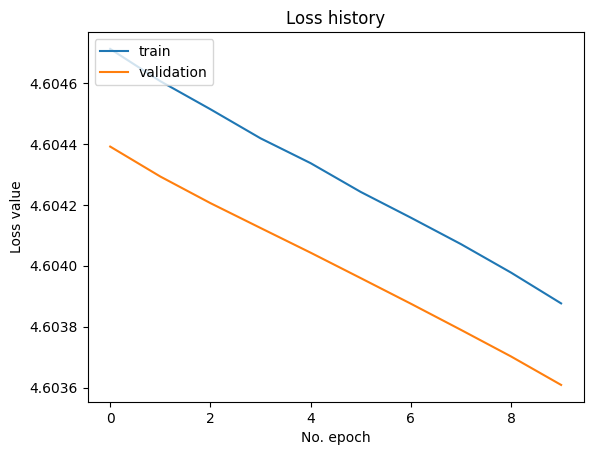

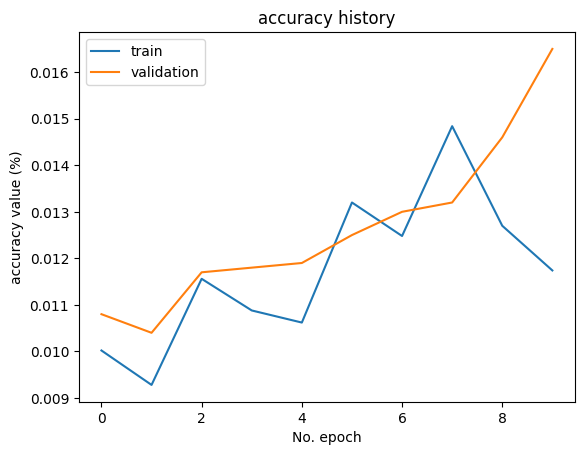

In [26]:
show_history(history2)

Observamos un accuracy en el set de validation de **1.65%** y como por cada epoch que va recorriendo el loss value disminuye, mientras que la accuracy incrementa.

### Intento 3  (2 capas, batch_size=45, epochs=10,activadores tanh) 

In [27]:
# capas de la red
input = Input(shape=(32,32,3)) #Según tamaño de la imagen y formato rgb
input_flat = layers.Flatten()(input)
layer = layers.Dense(units=100, activation='tanh')(input_flat)
layer = layers.Dense(units=50, activation='tanh')(layer)
output = layers.Dense(units=100, activation='tanh')(layer)

# creamos el modelo
model = Model(inputs=input, outputs=output)
print(model.summary())

# optimizador
optimizer = SGD(learning_rate=0.01)

# función loss
loss = SparseCategoricalCrossentropy(from_logits=False) #lo usamos porq es clasificacion

# métrica
metrics = ['accuracy']

# compilamos el modelo
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_8 (Dense)             (None, 100)               307300    
                                                                 
 dense_9 (Dense)             (None, 50)                5050      
                                                                 
 dense_10 (Dense)            (None, 100)               5100      
                                                                 
Total params: 317,450
Trainable params: 317,450
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
history3= model.fit(x=X_train, y=y_train, batch_size=45, epochs=10,
                           validation_data=(X_validation, y_validation))

Epoch 1/10
1112/1112 [==============================] - 7s 5ms/step - loss: 8.7083 - accuracy: 0.0098 - val_loss: 7.8793 - val_accuracy: 0.0100
Epoch 2/10
1112/1112 [==============================] - 6s 5ms/step - loss: 7.7973 - accuracy: 0.0100 - val_loss: 7.6605 - val_accuracy: 0.0100
Epoch 3/10
1112/1112 [==============================] - 6s 5ms/step - loss: 7.3044 - accuracy: 0.0100 - val_loss: 7.0448 - val_accuracy: 0.0100
Epoch 4/10
1112/1112 [==============================] - 5s 5ms/step - loss: 7.0992 - accuracy: 0.0100 - val_loss: 7.4112 - val_accuracy: 0.0100
Epoch 5/10
1112/1112 [==============================] - 6s 5ms/step - loss: 6.8731 - accuracy: 0.0100 - val_loss: 6.7724 - val_accuracy: 0.0100
Epoch 6/10
1112/1112 [==============================] - 6s 5ms/step - loss: 6.6315 - accuracy: 0.0100 - val_loss: 6.3403 - val_accuracy: 0.0100
Epoch 7/10
1112/1112 [==============================] - 6s 5ms/step - loss: 6.3229 - accuracy: 0.0100 - val_loss: 6.3330 - val_accuracy:

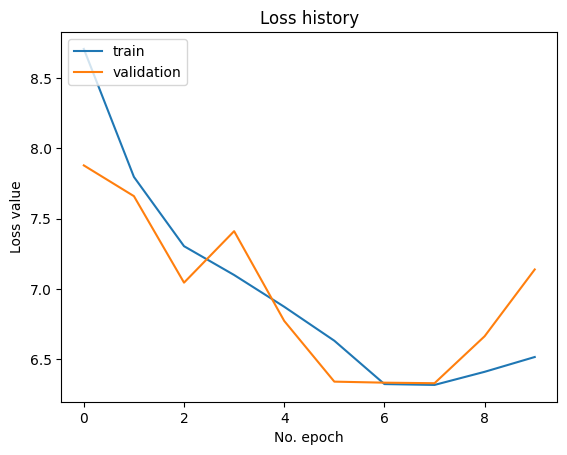

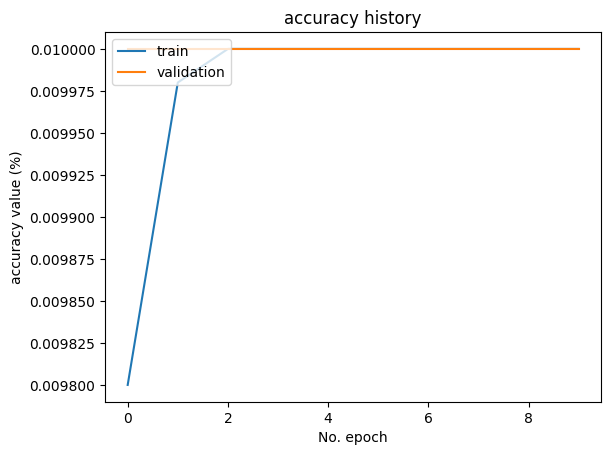

In [30]:
show_history(history3)

Observamos un accuracy en el set de validation de**1.65%** y como por cada epoch que va recorriendo el loss value disminuye, mientras que la accuracy incrementa pero se queda estancado en el 1%. **Parece ser que el activador 'tanh' no es el indicado para trabajar con CIFAR 100.**

### Intento 4  (4 capas, batch_size=50, epochs=20,activadores elu) 


In [31]:
# capas de la red
input = Input(shape=(32,32,3)) #Según tamaño de la imagen y formato rgb
input_flat = layers.Flatten()(input)
layer = layers.Dense(units=100, activation='elu')(input_flat)
layer = layers.Dense(units=70, activation='elu')(layer)
layer = layers.Dense(units=50, activation='elu')(layer)
layer = layers.Dense(units=40, activation='elu')(layer)
output = layers.Dense(units=100, activation='sigmoid')(layer)

# creamos el modelo
model = Model(inputs=input, outputs=output)
print(model.summary())

# optimizador
optimizer = SGD(learning_rate=0.01)

# función loss
loss = SparseCategoricalCrossentropy(from_logits=False) #lo usamos porq es clasificacion

# métrica
metrics = ['accuracy']

# compilamos el modelo
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_11 (Dense)            (None, 100)               307300    
                                                                 
 dense_12 (Dense)            (None, 70)                7070      
                                                                 
 dense_13 (Dense)            (None, 50)                3550      
                                                                 
 dense_14 (Dense)            (None, 40)                2040      
                                                                 
 dense_15 (Dense)            (None, 100)               4100

In [35]:
history4= model.fit(x=X_train, y=y_train, batch_size=50, epochs=20,
                           validation_data=(X_validation, y_validation))

Epoch 1/20
1000/1000 [==============================] - 5s 5ms/step - loss: 3.2149 - accuracy: 0.2235 - val_loss: 3.3253 - val_accuracy: 0.2091
Epoch 2/20
1000/1000 [==============================] - 5s 5ms/step - loss: 3.1864 - accuracy: 0.2297 - val_loss: 3.3412 - val_accuracy: 0.2053
Epoch 3/20
1000/1000 [==============================] - 5s 5ms/step - loss: 3.1677 - accuracy: 0.2331 - val_loss: 3.3082 - val_accuracy: 0.2121
Epoch 4/20
1000/1000 [==============================] - 5s 5ms/step - loss: 3.1530 - accuracy: 0.2333 - val_loss: 3.3425 - val_accuracy: 0.2065
Epoch 5/20
1000/1000 [==============================] - 6s 6ms/step - loss: 3.1383 - accuracy: 0.2361 - val_loss: 3.2835 - val_accuracy: 0.2164
Epoch 6/20
1000/1000 [==============================] - 5s 5ms/step - loss: 3.1220 - accuracy: 0.2407 - val_loss: 3.2776 - val_accuracy: 0.2140
Epoch 7/20
1000/1000 [==============================] - 5s 5ms/step - loss: 3.1089 - accuracy: 0.2412 - val_loss: 3.2704 - val_accuracy:

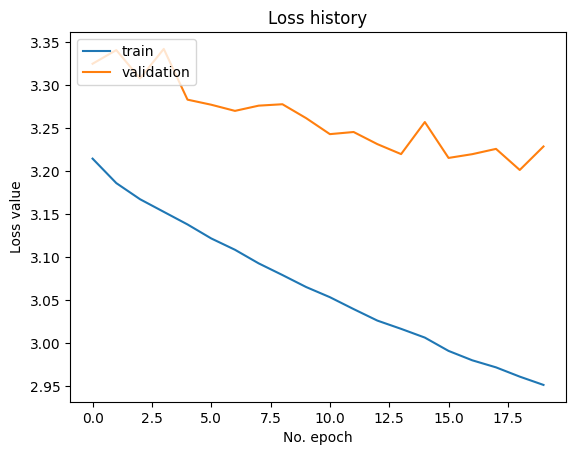

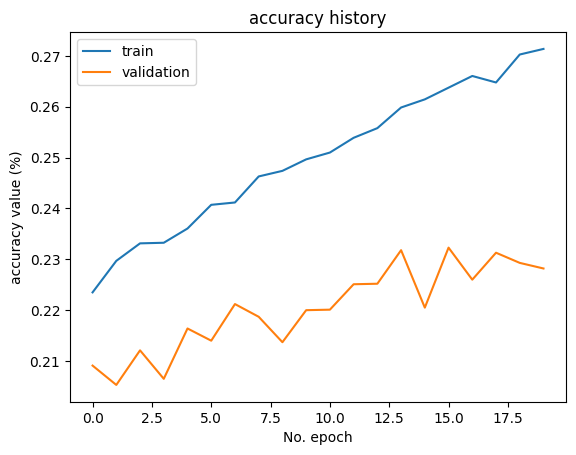

In [36]:
show_history(history4)

Observamos un accuracy en el set de validation de **22.82%** y como por cada epoch que va recorriendo el loss value disminuye, mientras que la accuracy incrementa. Con el **activador 'elu'** hemos obtenido beunso resultados, por lo que comenzaremos a utilizarlo en los próximos modelos variando características de capa, batch_size y layers.

### Intento 5 (4 capas, batch_size=10, epochs=10, activadores elu) 


In [37]:
# capas de la red
input = Input(shape=(32,32,3)) #Según tamaño de la imagen y formato rgb
input_flat = layers.Flatten()(input)
layer = layers.Dense(units=100, activation='elu')(input_flat)
layer = layers.Dense(units=70, activation='elu')(layer)
layer = layers.Dense(units=50, activation='elu')(layer)
layer = layers.Dense(units=40, activation='elu')(layer)
layer = layers.Dense(units=20, activation='elu')(layer)
output = layers.Dense(units=100, activation='sigmoid')(layer)

# creamos el modelo
model = Model(inputs=input, outputs=output)
print(model.summary())

# optimizador
optimizer = SGD(learning_rate=0.01)

# función loss
loss = SparseCategoricalCrossentropy(from_logits=False) #lo usamos porq es clasificacion

# métrica
metrics = ['accuracy']

# compilamos el modelo
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 dense_16 (Dense)            (None, 100)               307300    
                                                                 
 dense_17 (Dense)            (None, 70)                7070      
                                                                 
 dense_18 (Dense)            (None, 50)                3550      
                                                                 
 dense_19 (Dense)            (None, 40)                2040      
                                                                 
 dense_20 (Dense)            (None, 20)                820 

In [38]:
history5= model.fit(x=X_train, y=y_train, batch_size=10, epochs=10,
                           validation_data=(X_validation, y_validation))

Epoch 1/10
5000/5000 [==============================] - 20s 4ms/step - loss: 4.2309 - accuracy: 0.0591 - val_loss: 3.9571 - val_accuracy: 0.0875
Epoch 2/10
5000/5000 [==============================] - 18s 4ms/step - loss: 3.8176 - accuracy: 0.1118 - val_loss: 3.7894 - val_accuracy: 0.1202
Epoch 3/10
5000/5000 [==============================] - 20s 4ms/step - loss: 3.6739 - accuracy: 0.1348 - val_loss: 3.6412 - val_accuracy: 0.1425
Epoch 4/10
5000/5000 [==============================] - 19s 4ms/step - loss: 3.5727 - accuracy: 0.1537 - val_loss: 3.6319 - val_accuracy: 0.1475
Epoch 5/10
5000/5000 [==============================] - 23s 5ms/step - loss: 3.4960 - accuracy: 0.1655 - val_loss: 3.4918 - val_accuracy: 0.1634
Epoch 6/10
5000/5000 [==============================] - 20s 4ms/step - loss: 3.4305 - accuracy: 0.1768 - val_loss: 3.4457 - val_accuracy: 0.1782
Epoch 7/10
5000/5000 [==============================] - 19s 4ms/step - loss: 3.3770 - accuracy: 0.1882 - val_loss: 3.4335 - val_ac

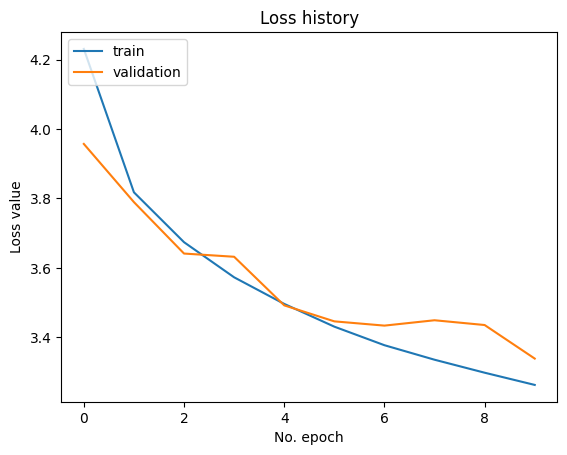

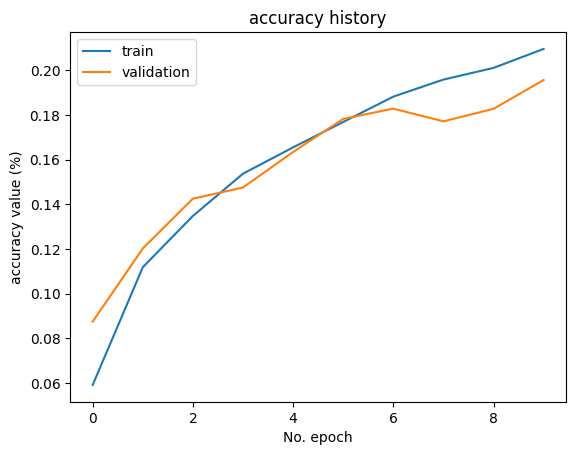

In [41]:
show_history(history5)

Observamos un accuracy en el set de validation de **19.56%** y como por cada epoch que va recorriendo el loss value disminuye, mientras que la accuracy incrementa también. 

### Intento 6 (4 capas, batch_size=50, epochs=20, activadores elu) 


In [39]:
# capas de la red
input = Input(shape=(32,32,3)) #Según tamaño de la imagen y formato rgb
input_flat = layers.Flatten()(input)
layer = layers.Dense(units=100, activation='elu')(input_flat)
layer = layers.Dense(units=70, activation='elu')(layer)
layer = layers.Dense(units=50, activation='elu')(layer)
layer = layers.Dense(units=20, activation='elu')(layer)
output = layers.Dense(units=100, activation='softmax')(layer)

# creamos el modelo
model = Model(inputs=input, outputs=output)
print(model.summary())

# optimizador
optimizer = SGD(learning_rate=0.01)

# función loss
loss = SparseCategoricalCrossentropy(from_logits=False) #lo usamos porq es clasificacion

# métrica
metrics = ['accuracy']

# compilamos el modelo
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_5 (Flatten)         (None, 3072)              0         
                                                                 
 dense_22 (Dense)            (None, 100)               307300    
                                                                 
 dense_23 (Dense)            (None, 70)                7070      
                                                                 
 dense_24 (Dense)            (None, 50)                3550      
                                                                 
 dense_25 (Dense)            (None, 20)                1020      
                                                                 
 dense_26 (Dense)            (None, 100)               2100

In [40]:
history6= model.fit(x=X_train, y=y_train, batch_size=50, epochs=20,
                           validation_data=(X_validation, y_validation))

Epoch 1/20
1000/1000 [==============================] - 6s 5ms/step - loss: 4.5055 - accuracy: 0.0263 - val_loss: 4.3645 - val_accuracy: 0.0403
Epoch 2/20
1000/1000 [==============================] - 5s 5ms/step - loss: 4.2186 - accuracy: 0.0608 - val_loss: 4.1037 - val_accuracy: 0.0771
Epoch 3/20
1000/1000 [==============================] - 6s 6ms/step - loss: 4.0055 - accuracy: 0.0887 - val_loss: 3.9566 - val_accuracy: 0.0955
Epoch 4/20
1000/1000 [==============================] - 6s 6ms/step - loss: 3.8691 - accuracy: 0.1095 - val_loss: 3.8392 - val_accuracy: 0.1159
Epoch 5/20
1000/1000 [==============================] - 5s 5ms/step - loss: 3.7774 - accuracy: 0.1254 - val_loss: 3.7455 - val_accuracy: 0.1358
Epoch 6/20
1000/1000 [==============================] - 5s 5ms/step - loss: 3.7072 - accuracy: 0.1362 - val_loss: 3.7075 - val_accuracy: 0.1366
Epoch 7/20
1000/1000 [==============================] - 5s 5ms/step - loss: 3.6514 - accuracy: 0.1454 - val_loss: 3.6563 - val_accuracy:

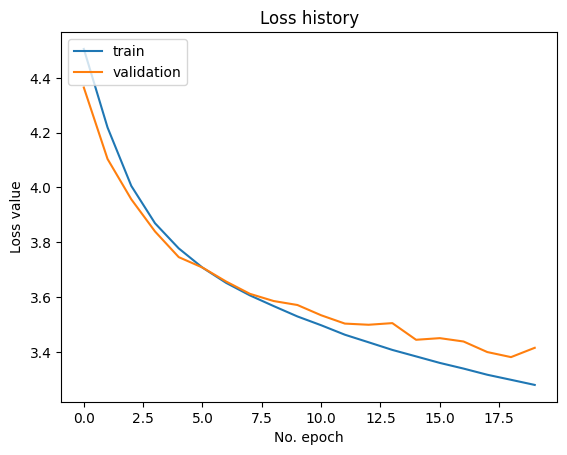

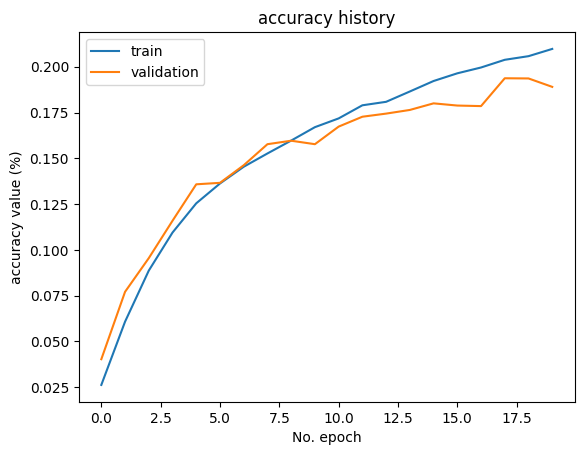

In [42]:
show_history(history6)

Observamos un accuracy en el set de validation de **18.90%** y como por cada epoch que va recorriendo el loss value disminuye, mientras que la accuracy incrementa también.

### Intento 7 (3 capas, batch_size=50, epochs=10, activadores elu y softmax) 

In [43]:
# capas de la red
input = Input(shape=(32,32,3)) #Según tamaño de la imagen y formato rgb
input_flat = layers.Flatten()(input)
layer = layers.Dense(units=100, activation='elu')(input_flat)
layer = layers.Dense(units=50, activation='elu')(layer)
layer = layers.Dense(units=20, activation='elu')(layer)
output = layers.Dense(units=100, activation='softmax')(layer)

# creamos el modelo
model = Model(inputs=input, outputs=output)
print(model.summary())

# optimizador
optimizer = SGD(learning_rate=0.01)

# función loss
loss = SparseCategoricalCrossentropy(from_logits=False) #lo usamos porq es clasificacion

# métrica
metrics = ['accuracy']

# compilamos el modelo
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_6 (Flatten)         (None, 3072)              0         
                                                                 
 dense_27 (Dense)            (None, 100)               307300    
                                                                 
 dense_28 (Dense)            (None, 50)                5050      
                                                                 
 dense_29 (Dense)            (None, 20)                1020      
                                                                 
 dense_30 (Dense)            (None, 100)               2100      
                                                                 
Total params: 315,470
Trainable params: 315,470
Non-trainab

In [44]:
history7= model.fit(x=X_train, y=y_train, batch_size=50, epochs=10,
                           validation_data=(X_validation, y_validation))

Epoch 1/10
1000/1000 [==============================] - 5s 5ms/step - loss: 4.4989 - accuracy: 0.0307 - val_loss: 4.3738 - val_accuracy: 0.0510
Epoch 2/10
1000/1000 [==============================] - 4s 4ms/step - loss: 4.2572 - accuracy: 0.0603 - val_loss: 4.1524 - val_accuracy: 0.0702
Epoch 3/10
1000/1000 [==============================] - 4s 4ms/step - loss: 4.0614 - accuracy: 0.0812 - val_loss: 3.9897 - val_accuracy: 0.0890
Epoch 4/10
1000/1000 [==============================] - 4s 4ms/step - loss: 3.9217 - accuracy: 0.1005 - val_loss: 3.8917 - val_accuracy: 0.1114
Epoch 5/10
1000/1000 [==============================] - 6s 6ms/step - loss: 3.8245 - accuracy: 0.1195 - val_loss: 3.8217 - val_accuracy: 0.1217
Epoch 6/10
1000/1000 [==============================] - 6s 6ms/step - loss: 3.7553 - accuracy: 0.1325 - val_loss: 3.7422 - val_accuracy: 0.1356
Epoch 7/10
1000/1000 [==============================] - 7s 7ms/step - loss: 3.7017 - accuracy: 0.1413 - val_loss: 3.7114 - val_accuracy:

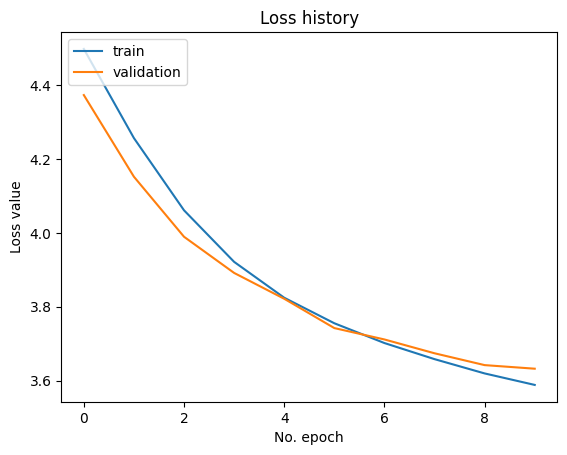

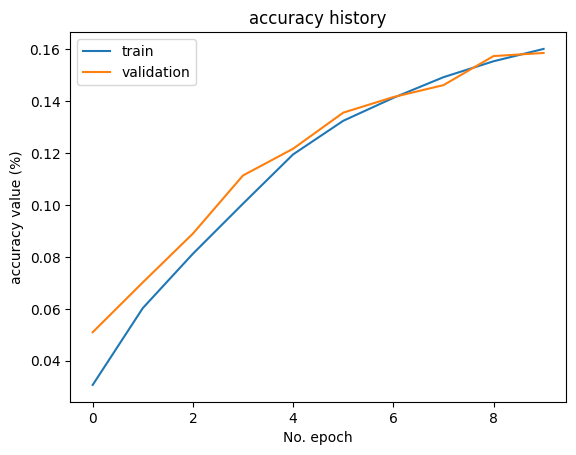

In [45]:
show_history(history7)

Observamos un accuracy en el set de validation de **15.86%** y como por cada epoch que va recorriendo el loss value disminuye, mientras que la accuracy incrementa también.

### Intento 8 (4 capas, batch_size=10, epochs=20, activadores elu y sigmoid) 

In [12]:
# capas de la red
input = Input(shape=(32,32,3)) #Según tamaño de la imagen y formato rgb
input_flat = layers.Flatten()(input)
layer = layers.Dense(units=100, activation='elu')(input_flat)
layer = layers.Dense(units=70, activation='elu')(layer)
layer = layers.Dense(units=50, activation='elu')(layer)
layer = layers.Dense(units=40, activation='elu')(layer)
output = layers.Dense(units=100, activation='sigmoid')(layer)

# creamos el modelo
model = Model(inputs=input, outputs=output)
print(model.summary())

# optimizador
optimizer = SGD(learning_rate=0.01)

# función loss
loss = SparseCategoricalCrossentropy(from_logits=False) #lo usamos porq es clasificacion

# métrica
metrics = ['accuracy']

# compilamos el modelo
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 100)               307300    
                                                                 
 dense_1 (Dense)             (None, 70)                7070      
                                                                 
 dense_2 (Dense)             (None, 50)                3550      
                                                                 
 dense_3 (Dense)             (None, 40)                2040      
                                                                 
 dense_4 (Dense)             (None, 100)               4100  

In [47]:
history8= model.fit(x=X_train, y=y_train, batch_size=10, epochs=20,
                           validation_data=(X_validation, y_validation))

Epoch 1/20
5000/5000 [==============================] - 22s 4ms/step - loss: 4.1614 - accuracy: 0.0672 - val_loss: 3.8334 - val_accuracy: 0.1125
Epoch 2/20
5000/5000 [==============================] - 19s 4ms/step - loss: 3.7266 - accuracy: 0.1294 - val_loss: 3.6551 - val_accuracy: 0.1433
Epoch 3/20
5000/5000 [==============================] - 17s 3ms/step - loss: 3.5690 - accuracy: 0.1553 - val_loss: 3.5128 - val_accuracy: 0.1640
Epoch 4/20
5000/5000 [==============================] - 17s 3ms/step - loss: 3.4677 - accuracy: 0.1723 - val_loss: 3.4498 - val_accuracy: 0.1777
Epoch 5/20
5000/5000 [==============================] - 16s 3ms/step - loss: 3.3929 - accuracy: 0.1852 - val_loss: 3.4063 - val_accuracy: 0.1921
Epoch 6/20
5000/5000 [==============================] - 17s 3ms/step - loss: 3.3263 - accuracy: 0.1984 - val_loss: 3.4223 - val_accuracy: 0.1816
Epoch 7/20
5000/5000 [==============================] - 17s 3ms/step - loss: 3.2755 - accuracy: 0.2075 - val_loss: 3.3442 - val_ac

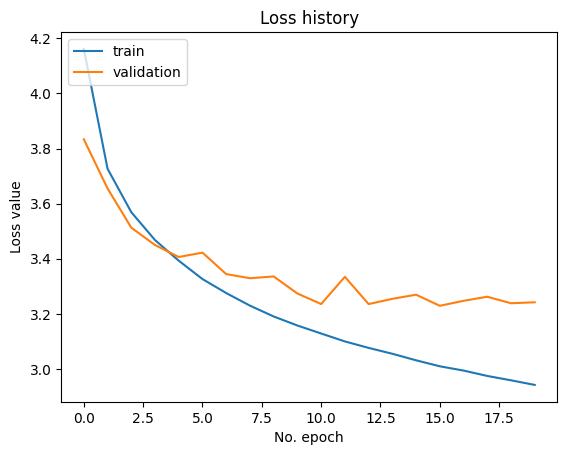

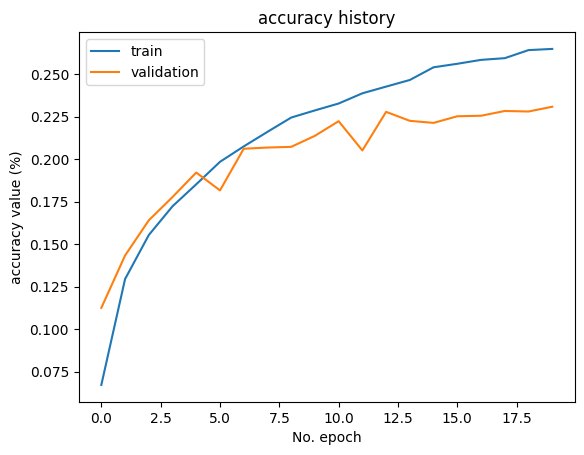

In [50]:
show_history(history8)

Observamos un accuracy en el set de validation de **23.08%** y como por cada epoch que va recorriendo el loss value disminuye, mientras que la accuracy incrementa también. Obteniendo con este modelo el mejor resultado de momento.

### Intento 9 (2 capas, batch_size=10, epochs=20, activadores elu y sigmoid) 

In [48]:
# capas de la red
input = Input(shape=(32,32,3)) #Según tamaño de la imagen y formato rgb
input_flat = layers.Flatten()(input)
layer = layers.Dense(units=100, activation='elu')(input_flat)
layer = layers.Dense(units=50, activation='elu')(layer)
output = layers.Dense(units=100, activation='sigmoid')(layer)

# creamos el modelo
model = Model(inputs=input, outputs=output)
print(model.summary())

# optimizador
optimizer = SGD(learning_rate=0.01)

# función loss
loss = SparseCategoricalCrossentropy(from_logits=False) #lo usamos porq es clasificacion

# métrica
metrics = ['accuracy']

# compilamos el modelo
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history9= model.fit(x=X_train, y=y_train, batch_size=10, epochs=20,
                           validation_data=(X_validation, y_validation))

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_8 (Flatten)         (None, 3072)              0         
                                                                 
 dense_36 (Dense)            (None, 100)               307300    
                                                                 
 dense_37 (Dense)            (None, 50)                5050      
                                                                 
 dense_38 (Dense)            (None, 100)               5100      
                                                                 
Total params: 317,450
Trainable params: 317,450
Non-trainable params: 0
_________________________________________________________________
None


In [49]:
history9= model.fit(x=X_train, y=y_train, batch_size=10, epochs=20,
                           validation_data=(X_validation, y_validation))

Epoch 1/20
5000/5000 [==============================] - 26s 5ms/step - loss: 4.1121 - accuracy: 0.0781 - val_loss: 3.8489 - val_accuracy: 0.1232
Epoch 2/20
5000/5000 [==============================] - 20s 4ms/step - loss: 3.7039 - accuracy: 0.1390 - val_loss: 3.6240 - val_accuracy: 0.1607
Epoch 3/20
5000/5000 [==============================] - 19s 4ms/step - loss: 3.5526 - accuracy: 0.1647 - val_loss: 3.5843 - val_accuracy: 0.1610
Epoch 4/20
5000/5000 [==============================] - 21s 4ms/step - loss: 3.4591 - accuracy: 0.1795 - val_loss: 3.5238 - val_accuracy: 0.1783
Epoch 5/20
5000/5000 [==============================] - 17s 3ms/step - loss: 3.3833 - accuracy: 0.1934 - val_loss: 3.4002 - val_accuracy: 0.1942
Epoch 6/20
5000/5000 [==============================] - 19s 4ms/step - loss: 3.3243 - accuracy: 0.2037 - val_loss: 3.3874 - val_accuracy: 0.1961
Epoch 7/20
5000/5000 [==============================] - 20s 4ms/step - loss: 3.2751 - accuracy: 0.2098 - val_loss: 3.3385 - val_ac

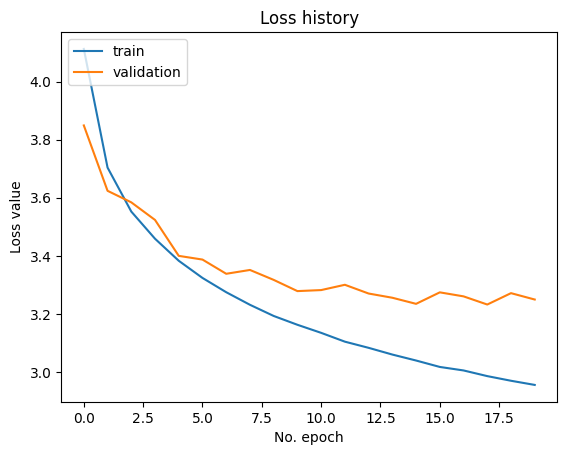

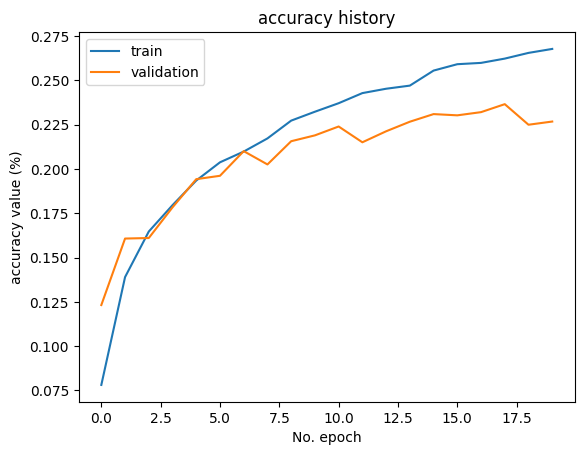

In [51]:
show_history(history9)

Observamos un accuracy en el set de validation de **22.67%** y como por cada epoch que va recorriendo el loss value disminuye, mientras que la accuracy incrementa también.

[Ir arriba del documento](#top)

## <a name="comparacion">  4. Comparativa según batch size y número de neuronas  <a> 

Una vez realizadas las diferentes pruebas de redes neuronales, vamos a trabajar con la que mejor resultado nos ha dado, **el intento nº 8**.

In [13]:
# capas de la red
input = Input(shape=(32,32,3)) #Según tamaño de la imagen y formato rgb
input_flat = layers.Flatten()(input)
layer = layers.Dense(units=100, activation='elu')(input_flat)
layer = layers.Dense(units=70, activation='elu')(layer)
layer = layers.Dense(units=50, activation='elu')(layer)
layer = layers.Dense(units=40, activation='elu')(layer)
output = layers.Dense(units=100, activation='sigmoid')(layer)

# creamos el modelo
model = Model(inputs=input, outputs=output)
print(model.summary())

# optimizador
optimizer = SGD(learning_rate=0.01)

# función loss
loss = SparseCategoricalCrossentropy(from_logits=False) #lo usamos porq es clasificacion

# métrica
metrics = ['accuracy']

# compilamos el modelo
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_5 (Dense)             (None, 100)               307300    
                                                                 
 dense_6 (Dense)             (None, 70)                7070      
                                                                 
 dense_7 (Dense)             (None, 50)                3550      
                                                                 
 dense_8 (Dense)             (None, 40)                2040      
                                                                 
 dense_9 (Dense)             (None, 100)               4100

In [14]:
history8= model.fit(x=X_train, y=y_train, batch_size=10, epochs=20,
                           validation_data=(X_validation, y_validation))

Epoch 1/20
5000/5000 [==============================] - 20s 4ms/step - loss: 4.1502 - accuracy: 0.0676 - val_loss: 3.8346 - val_accuracy: 0.1063
Epoch 2/20
5000/5000 [==============================] - 19s 4ms/step - loss: 3.7270 - accuracy: 0.1265 - val_loss: 3.6399 - val_accuracy: 0.1454
Epoch 3/20
5000/5000 [==============================] - 22s 4ms/step - loss: 3.5700 - accuracy: 0.1521 - val_loss: 3.5301 - val_accuracy: 0.1659
Epoch 4/20
5000/5000 [==============================] - 19s 4ms/step - loss: 3.4687 - accuracy: 0.1715 - val_loss: 3.5078 - val_accuracy: 0.1728
Epoch 5/20
5000/5000 [==============================] - 21s 4ms/step - loss: 3.3948 - accuracy: 0.1870 - val_loss: 3.4345 - val_accuracy: 0.1824
Epoch 6/20
5000/5000 [==============================] - 20s 4ms/step - loss: 3.3355 - accuracy: 0.1964 - val_loss: 3.4030 - val_accuracy: 0.1855
Epoch 7/20
5000/5000 [==============================] - 19s 4ms/step - loss: 3.2853 - accuracy: 0.2053 - val_loss: 3.3426 - val_ac

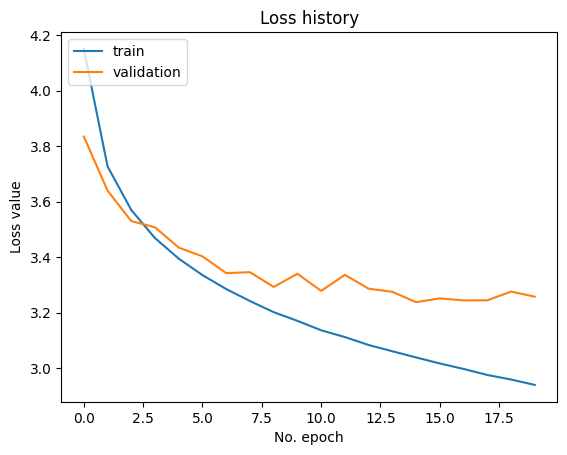

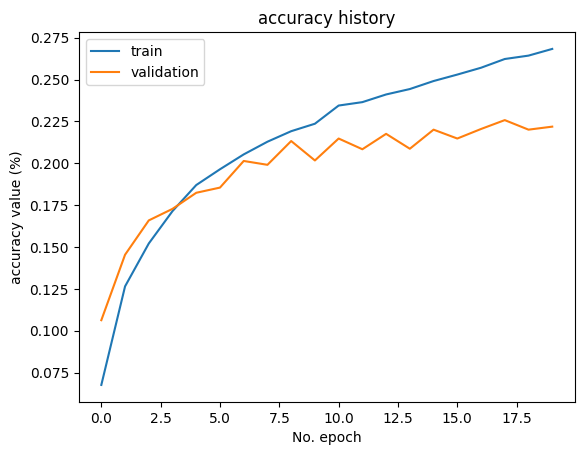

In [15]:
show_history(history8)

### <a name="batch"> 4.1. Comparación score vs batch size <a>

Para comprobar como afecta el nº de batch size al score de la red neuronal vamos a proceder a **aumentar el nº de batch y ver como afecta al accuracy y al loss score**. 

In [4]:
y1 = []
x1 = []
for n in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    
    print('Red neuronal con ' + str(n*10) + ' de batch size')
    # capas de la red
    input = Input(shape=(32,32,3)) #Según tamaño de la imagen y formato rgb
    input_flat = layers.Flatten()(input)
    layer = layers.Dense(units=100, activation='elu')(input_flat)
    layer = layers.Dense(units=70, activation='elu')(layer)
    layer = layers.Dense(units=50, activation='elu')(layer)
    layer = layers.Dense(units=40, activation='elu')(layer)
    output = layers.Dense(units=100, activation='sigmoid')(layer)

    # creamos el modelo
    model = Model(inputs=input, outputs=output)
    #print(model.summary())

    # optimizador
    optimizer = SGD(learning_rate=0.01)

    # función loss
    loss = SparseCategoricalCrossentropy(from_logits=False) #lo usamos porq es clasificacion

    # métrica
    metrics = ['accuracy']

    # compilamos el modelo
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    # Entrenamos el modelo
    history8= model.fit(x=X_train, y=y_train, batch_size=10*n, epochs=20,
                               validation_data=(X_validation, y_validation))

    # Guardamos el último accuracy de cada intento
    accuracy_val= (history8.history['val_accuracy'][-1] *100)
    y1.append(accuracy_val)
    x1.append(n*10)


Red neuronal con 10 de batch size
Epoch 1/20
5000/5000 [==============================] - 23s 5ms/step - loss: 4.1727 - accuracy: 0.0669 - val_loss: 3.8602 - val_accuracy: 0.1098
Epoch 2/20
5000/5000 [==============================] - 22s 4ms/step - loss: 3.7294 - accuracy: 0.1283 - val_loss: 3.6966 - val_accuracy: 0.1269
Epoch 3/20
5000/5000 [==============================] - 23s 5ms/step - loss: 3.5729 - accuracy: 0.1556 - val_loss: 3.5981 - val_accuracy: 0.1578
Epoch 4/20
5000/5000 [==============================] - 23s 5ms/step - loss: 3.4792 - accuracy: 0.1711 - val_loss: 3.4885 - val_accuracy: 0.1772
Epoch 5/20
5000/5000 [==============================] - 17s 3ms/step - loss: 3.4042 - accuracy: 0.1842 - val_loss: 3.4321 - val_accuracy: 0.1878
Epoch 6/20
5000/5000 [==============================] - 17s 3ms/step - loss: 3.3448 - accuracy: 0.1944 - val_loss: 3.3937 - val_accuracy: 0.1877
Epoch 7/20
5000/5000 [==============================] - 19s 4ms/step - loss: 3.2899 - accuracy: 

Epoch 17/20
1667/1667 [==============================] - 8s 5ms/step - loss: 3.1556 - accuracy: 0.2318 - val_loss: 3.3727 - val_accuracy: 0.2007
Epoch 18/20
1667/1667 [==============================] - 8s 5ms/step - loss: 3.1368 - accuracy: 0.2329 - val_loss: 3.2821 - val_accuracy: 0.2186
Epoch 19/20
1667/1667 [==============================] - 8s 5ms/step - loss: 3.1168 - accuracy: 0.2388 - val_loss: 3.3232 - val_accuracy: 0.2082
Epoch 20/20
1667/1667 [==============================] - 8s 5ms/step - loss: 3.0962 - accuracy: 0.2433 - val_loss: 3.2692 - val_accuracy: 0.2190
Red neuronal con 40 de batch size
Epoch 1/20
1250/1250 [==============================] - 9s 6ms/step - loss: 4.4250 - accuracy: 0.0375 - val_loss: 4.2112 - val_accuracy: 0.0568
Epoch 2/20
1250/1250 [==============================] - 7s 5ms/step - loss: 4.0646 - accuracy: 0.0824 - val_loss: 3.9189 - val_accuracy: 0.1078
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 3.8477 - accuracy: 0.1

Epoch 10/20
556/556 [==============================] - 5s 10ms/step - loss: 3.6701 - accuracy: 0.1441 - val_loss: 3.7093 - val_accuracy: 0.1423
Epoch 11/20
556/556 [==============================] - 5s 10ms/step - loss: 3.6363 - accuracy: 0.1509 - val_loss: 3.7166 - val_accuracy: 0.1416
Epoch 12/20
556/556 [==============================] - 5s 10ms/step - loss: 3.6051 - accuracy: 0.1576 - val_loss: 3.7114 - val_accuracy: 0.1439
Epoch 13/20
556/556 [==============================] - 5s 10ms/step - loss: 3.5753 - accuracy: 0.1603 - val_loss: 3.6098 - val_accuracy: 0.1597
Epoch 14/20
556/556 [==============================] - 5s 10ms/step - loss: 3.5493 - accuracy: 0.1664 - val_loss: 3.6349 - val_accuracy: 0.1549
Epoch 15/20
556/556 [==============================] - 5s 10ms/step - loss: 3.5257 - accuracy: 0.1709 - val_loss: 3.6177 - val_accuracy: 0.1585
Epoch 16/20
556/556 [==============================] - 5s 9ms/step - loss: 3.4997 - accuracy: 0.1764 - val_loss: 3.5739 - val_accuracy: 

334/334 [==============================] - 4s 11ms/step - loss: 4.4668 - accuracy: 0.0348 - val_loss: 4.4164 - val_accuracy: 0.0342
Epoch 3/20
334/334 [==============================] - 4s 12ms/step - loss: 4.3501 - accuracy: 0.0459 - val_loss: 4.3026 - val_accuracy: 0.0545
Epoch 4/20
334/334 [==============================] - 3s 10ms/step - loss: 4.2279 - accuracy: 0.0612 - val_loss: 4.1820 - val_accuracy: 0.0680
Epoch 5/20
334/334 [==============================] - 4s 12ms/step - loss: 4.1212 - accuracy: 0.0772 - val_loss: 4.0945 - val_accuracy: 0.0803
Epoch 6/20
334/334 [==============================] - 3s 9ms/step - loss: 4.0309 - accuracy: 0.0911 - val_loss: 4.0110 - val_accuracy: 0.0978
Epoch 7/20
334/334 [==============================] - 3s 9ms/step - loss: 3.9520 - accuracy: 0.1030 - val_loss: 3.9512 - val_accuracy: 0.1049
Epoch 8/20
334/334 [==============================] - 3s 9ms/step - loss: 3.8848 - accuracy: 0.1146 - val_loss: 3.8948 - val_accuracy: 0.1148
Epoch 9/20
33

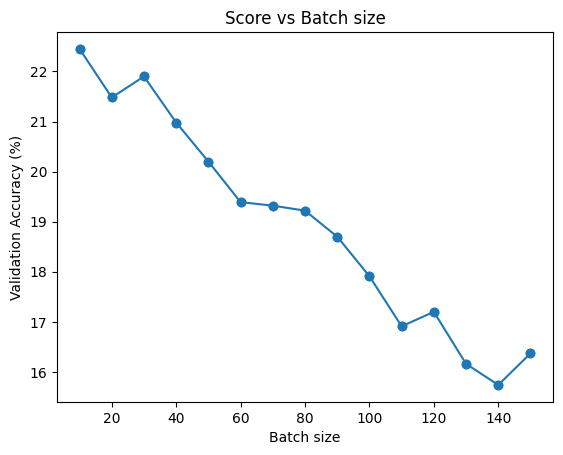

In [6]:
# Representamos graficamente
plt.scatter(x1, y1)
plt.title('Score vs Batch size')
plt.ylabel('Validation Accuracy (%)')
plt.xlabel('Batch size')
plt.plot(x1,y1, '-o')
plt.show()

**Una vez realizadas las pruebas incrementando el batch size, concluimos representandolo graficamente como el score va disminuyendo según el batch size va creciedno, por lo que a menor batch size, mejor accuracy obtendrá nuestro modelo.**

### <a name="neuronas"> 4.2. Comparación score vs número de neuronas<a>

Para comprobar como afecta el nº de batch size al score de la red neuronal vamos a proceder a **aumentar el nº de neuronas y ver como afecta al accuracy y al loss score**. 

In [7]:
y2 = []
x2 = []

    
for n in [1,2,3,4,5,6,7,8,9]:
    
    print('Red neuronal con el número de neuronas multiplicado por ' + str(n))
    # capas de la red
    input = Input(shape=(32,32,3)) #Según tamaño de la imagen y formato rgb
    input_flat = layers.Flatten()(input)
    layer = layers.Dense(units=100*n, activation='elu')(input_flat)
    layer = layers.Dense(units=70*n, activation='elu')(layer)
    layer = layers.Dense(units=50*n, activation='elu')(layer)
    layer = layers.Dense(units=40*n, activation='elu')(layer)
    output = layers.Dense(units=100, activation='sigmoid')(layer)

    # creamos el modelo
    model = Model(inputs=input, outputs=output)
    #print(model.summary())

    # optimizador
    optimizer = SGD(learning_rate=0.01)

    # función loss
    loss = SparseCategoricalCrossentropy(from_logits=False) #lo usamos porq es clasificacion

    # métrica
    metrics = ['accuracy']

    # compilamos el modelo
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    # Entrenamos el modelo
    history8= model.fit(x=X_train, y=y_train, batch_size=10, epochs=20,
                               validation_data=(X_validation, y_validation))

    # Guardamos el último accuracy de cada intento
    accuracy_val= (history8.history['val_accuracy'][-1] *100)
    y2.append(accuracy_val)
    x2.append(n)

    print('-------------------------------------------------')
    
    

Red neuronal con el número de neuronas multiplicado por 1
Epoch 1/20
5000/5000 [==============================] - 23s 5ms/step - loss: 4.1664 - accuracy: 0.0679 - val_loss: 3.8587 - val_accuracy: 0.1112
Epoch 2/20
5000/5000 [==============================] - 19s 4ms/step - loss: 3.7272 - accuracy: 0.1265 - val_loss: 3.6512 - val_accuracy: 0.1448
Epoch 3/20
5000/5000 [==============================] - 20s 4ms/step - loss: 3.5644 - accuracy: 0.1539 - val_loss: 3.5454 - val_accuracy: 0.1606
Epoch 4/20
5000/5000 [==============================] - 30s 6ms/step - loss: 3.4602 - accuracy: 0.1720 - val_loss: 3.4663 - val_accuracy: 0.1796
Epoch 5/20
5000/5000 [==============================] - 20s 4ms/step - loss: 3.3843 - accuracy: 0.1879 - val_loss: 3.3981 - val_accuracy: 0.1938
Epoch 6/20
5000/5000 [==============================] - 17s 3ms/step - loss: 3.3215 - accuracy: 0.1987 - val_loss: 3.4466 - val_accuracy: 0.1789
Epoch 7/20
5000/5000 [==============================] - 16s 3ms/step - l

Epoch 9/20
5000/5000 [==============================] - 70s 14ms/step - loss: 2.7732 - accuracy: 0.3029 - val_loss: 3.1269 - val_accuracy: 0.2488
Epoch 10/20
5000/5000 [==============================] - 70s 14ms/step - loss: 2.6980 - accuracy: 0.3134 - val_loss: 3.0847 - val_accuracy: 0.2653
Epoch 11/20
5000/5000 [==============================] - 70s 14ms/step - loss: 2.6251 - accuracy: 0.3275 - val_loss: 3.2387 - val_accuracy: 0.2391
Epoch 12/20
5000/5000 [==============================] - 70s 14ms/step - loss: 2.5512 - accuracy: 0.3461 - val_loss: 3.1389 - val_accuracy: 0.2647
Epoch 13/20
5000/5000 [==============================] - 72s 14ms/step - loss: 2.4776 - accuracy: 0.3622 - val_loss: 3.1649 - val_accuracy: 0.2607
Epoch 14/20
5000/5000 [==============================] - 71s 14ms/step - loss: 2.4020 - accuracy: 0.3761 - val_loss: 3.1395 - val_accuracy: 0.2637
Epoch 15/20
5000/5000 [==============================] - 71s 14ms/step - loss: 2.3286 - accuracy: 0.3881 - val_loss: 3.

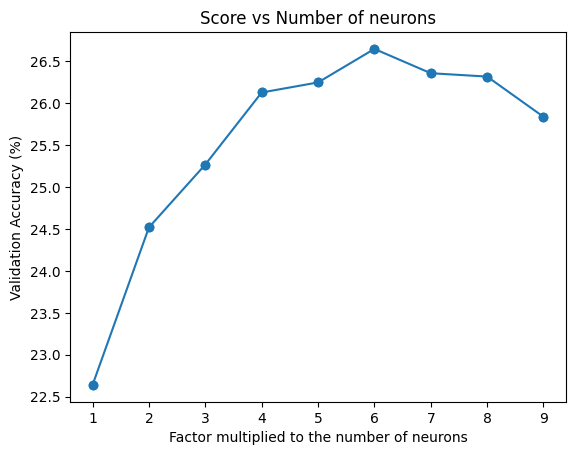

In [8]:
# Representamos graficamente
plt.scatter(x2, y2)
plt.title('Score vs Number of neurons')
plt.ylabel('Validation Accuracy (%)')
plt.xlabel('Factor multiplied to the number of neurons')
plt.plot(x2,y2, '-o')
plt.show()

Una vez analizado el modelo incrementando el nº de neuronas multiplicándose por un factor, al representarlo graficamente observamos como al incrementar el nº de neuronas, el score de nuestro modelo incrementa también, sin embargo, llega un momento, en este caso a partir del factor 6 que nuestra red neuronal se estanca y no logra aumentar su accuracy, sino que va descendiendo con los siguientes factores.

**Concluimos pues, que un mayor número de neuronas aumenta el score, pero no es infinito sino que según se añaden más neuronas a cada capa , el modelo se estanca y no logra mejorar en cierto punto.**

[Ir arriba del documento](#top)

## <a name="modelos"> 5. Comparación de modelos <a>

En este punto procederemos a hacer la comparativa de scores (**acc, recall, precision, f1, confusion matrix**) entre los siguientes modelos:
- **Random Forest**
- **Otro modelo a elegir de Machine Learning: Arboles de decisión**
- **Una red neuronal**
- **Random forest sobre el histograma del LBP**
- **Una red neuronal sobre el histograma del LBP**

Para poder entender los diferentes scores vamos a explicar que representan cada uno:
    


- La métrica **accuracy** representa el porcentaje total de valores correctamente clasificados, tanto positivos como negativos.

- La métrica de **precisión** es utilizada para poder saber qué porcentaje de valores que se han clasificado como positivos son realmente positivos.

- La métrica de **recall**, también conocida como el ratio de verdaderos positivos, es utilizada para saber cuantos valores positivos son correctamente clasificados.

- La métrica de **F1**, muy utilizada en problemas en los que el conjunto de datos a analizar está desbalanceado. Esta métrica combina el precision y el recall, para obtener un valor mucho más objetivo.


- **Matriz de Confusión**:

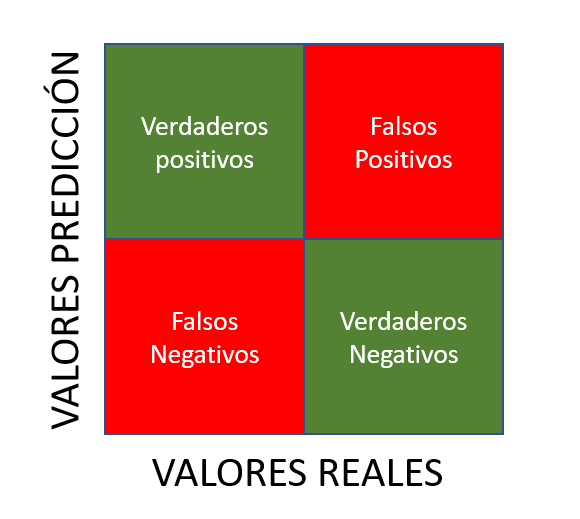

### <a name="random">  5.1. Random Forest <a>

Definimos el modelo con el que vamos a trabajar y optimizamos el modelo con el set de train:

In [6]:
# Seleccionamos el modelo.
clf = RandomForestClassifier(n_estimators=25)

# Optimizamos el modelo.
clf.fit(X_train.reshape((X_train.shape[0],-1)), y_train.reshape((-1,1)))

# Obtenemos el score del modelo.
print('score rf = ',clf.score(X_validation.reshape((X_validation.shape[0],-1)), y_validation.reshape((-1,1))))

score rf =  0.1724


In [6]:
#Transformamos los valores para poder obtener los diferentes scores.
X_validation_t = X_validation.reshape((X_validation.shape[0],-1))
y_validation_t = y_validation.reshape((-1,1))

Obtenemos la predicción del modelo sobre el set de validación:

In [7]:
prediction = clf.predict(X_validation_t)

Imprimimos los diferentes scores y representamos la matriz de confusión:

El accuracy score del modelo Random Forest  es 0.172
El f1 score del modelo Random Forest es 0.163
El recall score del modelo Random Forest es  0.172
El precision score del modelo Random Forest es  0.17
La matriz de confusión del modelo Random Forest es:  


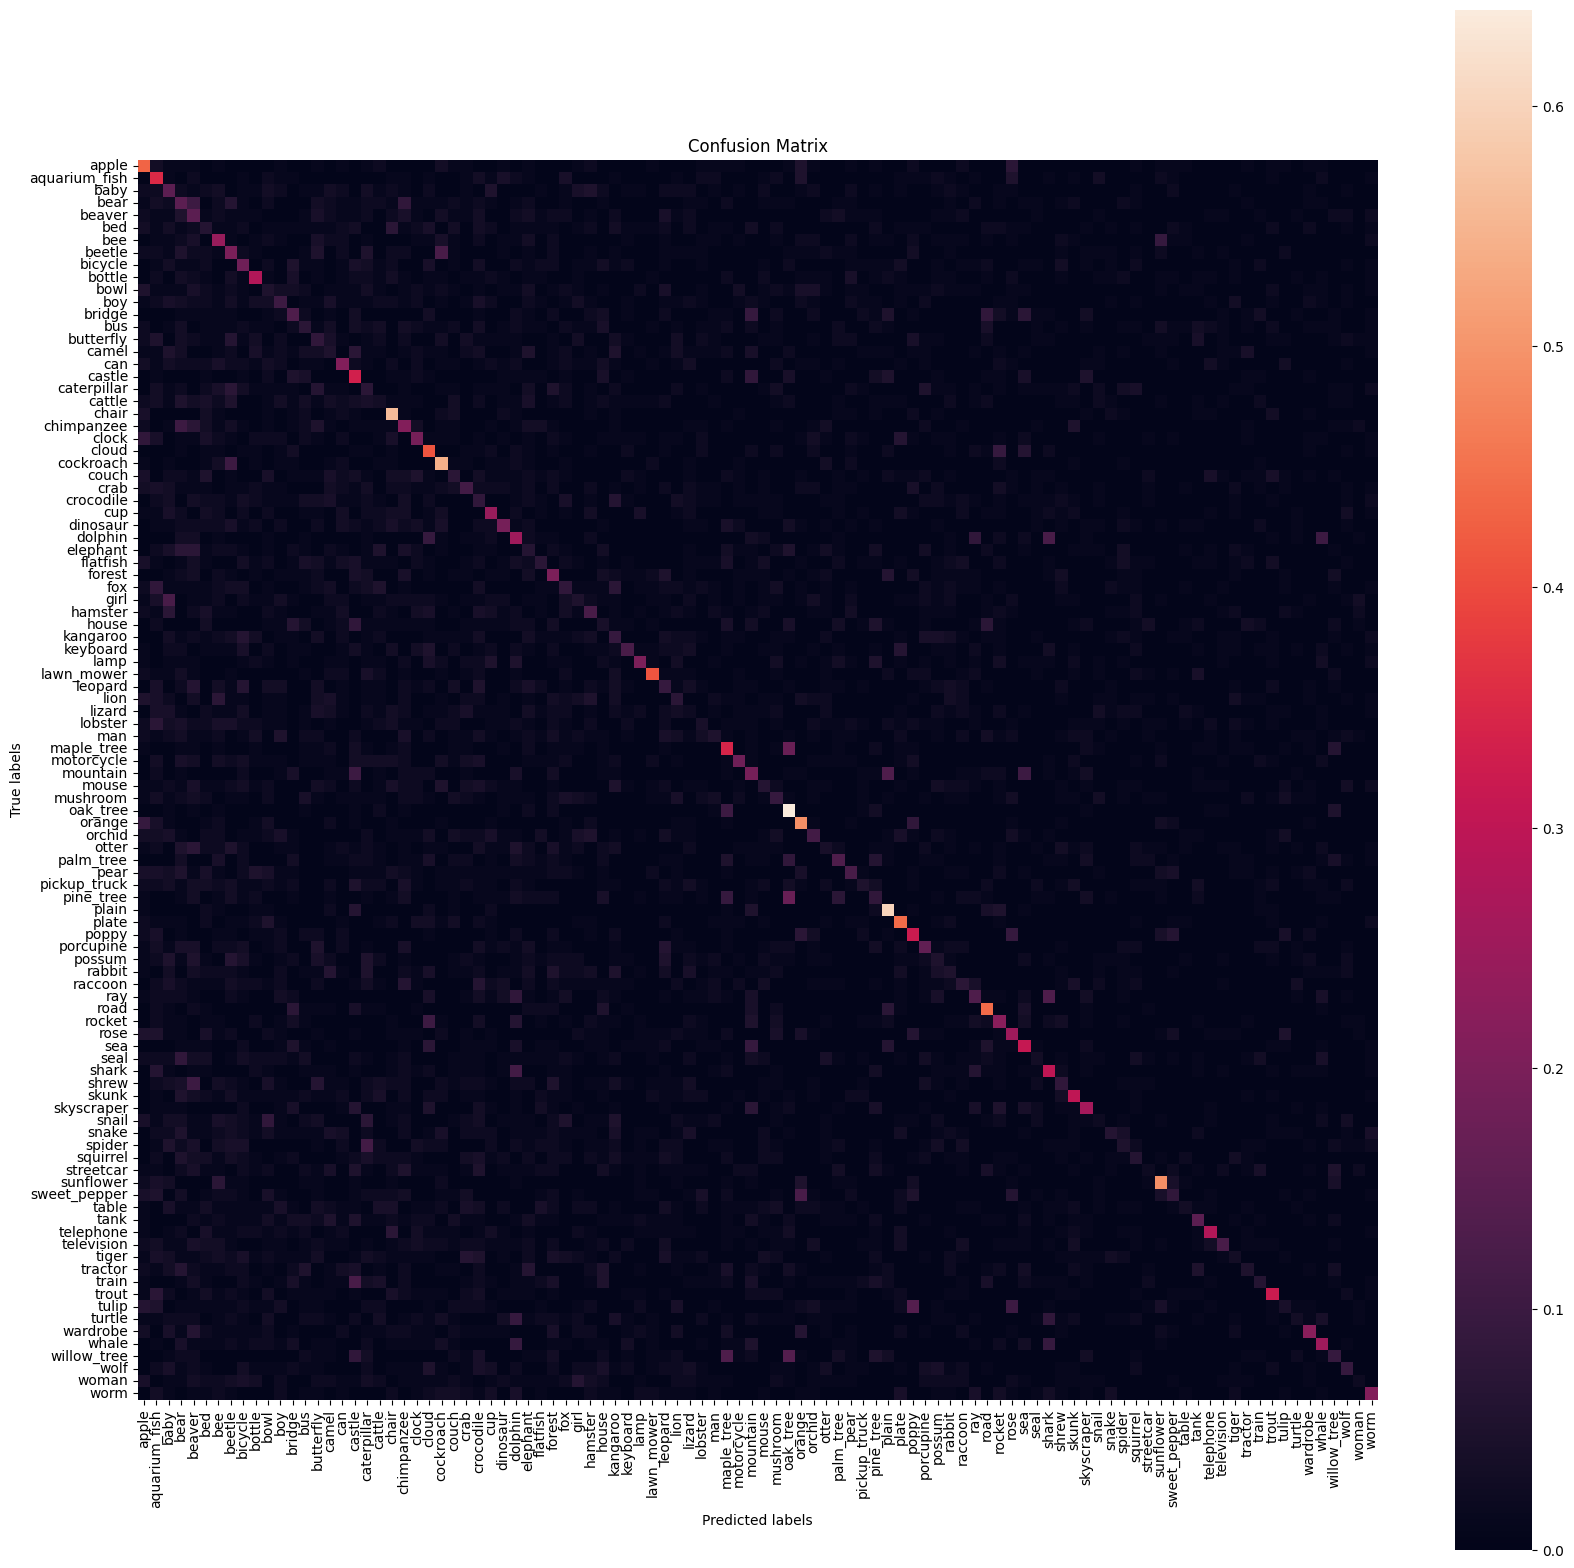

In [22]:
print('El accuracy score del modelo Random Forest  es ' + str(round(accuracy_score(y_validation_t, prediction),3)))

print('El f1 score del modelo Random Forest es ' + str(round(f1_score(y_validation_t, prediction, average='macro'),3)))

print('El recall score del modelo Random Forest es  ' + str(round(recall_score(y_validation_t, prediction, average='macro'),3)))

print('El precision score del modelo Random Forest es  ' + str(round(precision_score(y_validation_t, prediction, average='macro'),3)))

print('La matriz de confusión del modelo Random Forest es:  ')

from matplotlib.axis import Axis
plt.figure(figsize=(20,20))
sns.heatmap(confusion_matrix(y_validation_t, prediction,normalize='true'), square = True, annot=False,xticklabels= labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.show();

**Los scores son muy parejos entre sí, este modelo nos ha devuelto un accuracy score del 17.2%. El score no es bueno, por lo que habría que buscar un modelo mejor o tratar de mejorarlo.**

Si quisieramos entrar en detalle con cada score de cada clase podríamos encontrarlo con la siguiente función:

In [21]:
print(classification_report(y_validation_t, prediction, target_names = labels))

               precision    recall  f1-score   support

        apple       0.23      0.43      0.30       100
aquarium_fish       0.16      0.35      0.22       100
         baby       0.08      0.15      0.11       100
         bear       0.07      0.15      0.10       100
       beaver       0.07      0.15      0.10       100
          bed       0.04      0.06      0.05       100
          bee       0.14      0.24      0.18       100
       beetle       0.11      0.20      0.14       100
      bicycle       0.11      0.18      0.14       100
       bottle       0.25      0.28      0.26       100
         bowl       0.04      0.05      0.04       100
          boy       0.09      0.10      0.10       100
       bridge       0.11      0.13      0.12       100
          bus       0.07      0.07      0.07       100
    butterfly       0.06      0.08      0.07       100
        camel       0.04      0.05      0.05       100
          can       0.19      0.21      0.20       100
       ca

###  <a name="arboles"> 5.2. Modelo de Machine Learning : Árboles de decisión <a>

Procedemos a realizar un modelo de arboles de decisión, en este caso utilizaremos el criterio de gini y una máxima profundidad de 5.

A priori, este modelo debería de darnos un score más bajo al ser mucho más sencillo que el random forest, el cual utiliza varios arboles de decisión.

In [32]:
# Definimos el claisifcador y sus criterios.
clf = DecisionTreeClassifier(criterion='gini', max_depth=5)

In [33]:
# Optimizamos el modelo con los valores de training.
clf.fit(X_train.reshape((X_train.shape[0],-1)), y_train.reshape((-1,1)))

In [34]:
#Realizamos la predicción de los valores.
prediction2 = clf.predict(X_validation_t)

Procedemos a calcular los diferentes scores:

El accuracy score del modelo Random Forest  es 0.063
El f1 score del modelo Random Forest es 0.035
El recall score del modelo Random Forest es  0.063
El precision score del modelo Random Forest es  0.038
La matriz de confusión del modelo Random Forest es:  


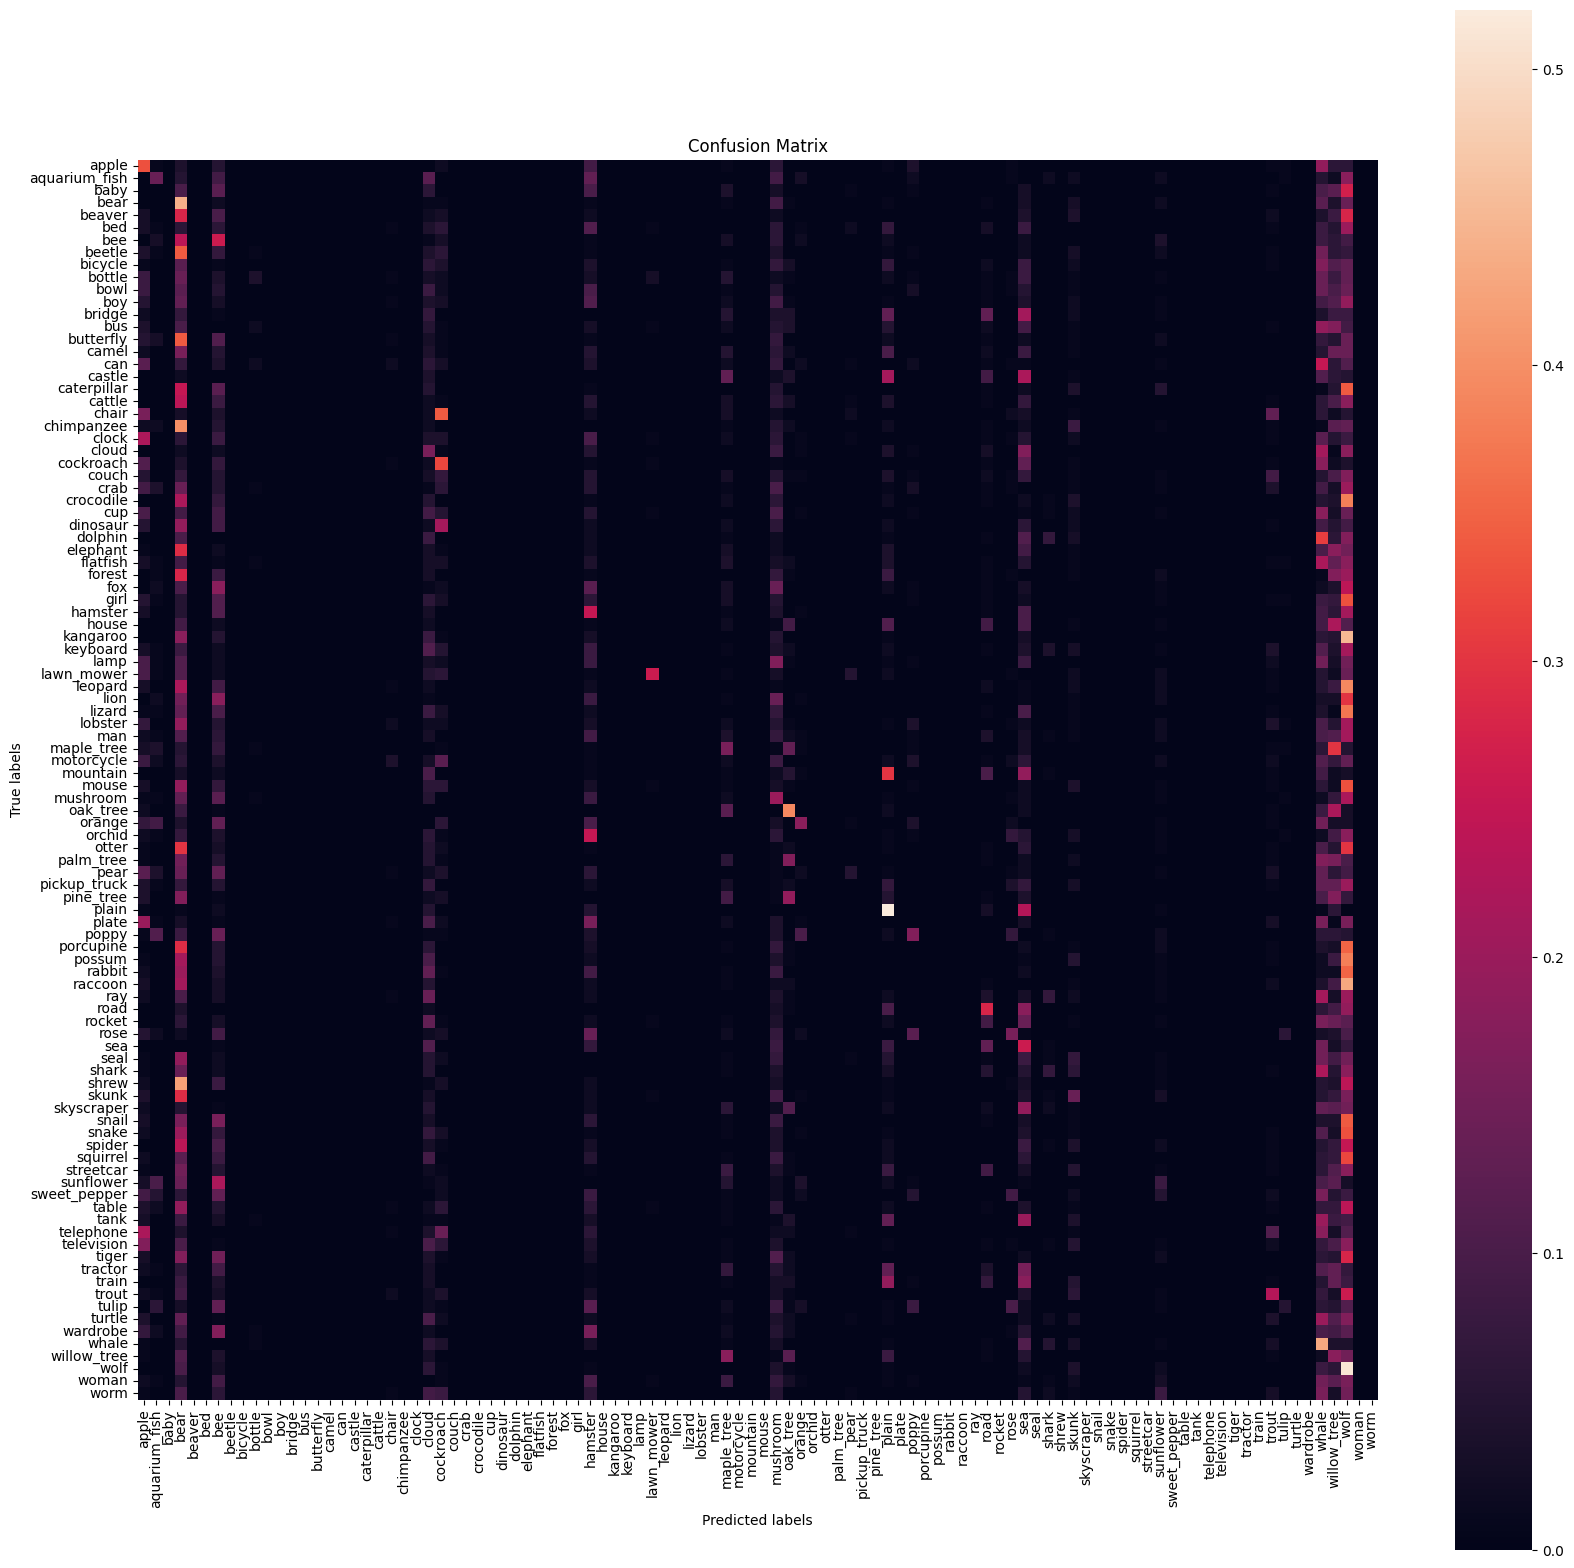

In [35]:
print('El accuracy score del modelo Random Forest  es ' + str(round(accuracy_score(y_validation_t, prediction2),3)))

print('El f1 score del modelo Random Forest es ' + str(round(f1_score(y_validation_t, prediction2, average='macro'),3)))

print('El recall score del modelo Random Forest es  ' + str(round(recall_score(y_validation_t, prediction2, average='macro'),3)))

print('El precision score del modelo Random Forest es  ' + str(round(precision_score(y_validation_t, prediction2, average='macro'),3)))

print('La matriz de confusión del modelo Random Forest es:  ')

from matplotlib.axis import Axis
plt.figure(figsize=(20,20))
sns.heatmap(confusion_matrix(y_validation_t, prediction2,normalize='true'), square = True, annot=False,xticklabels= labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.show();

**Como ya mencioné anteriormente este score nos ha devuelto un score más bajo que el resto al ser más simple, con solo un 6.3% de accuracy. No sería recomendable usar este modelo debido a su bajo acierto de predicción.** 

Observamos las scores de cada clase individualmente:

In [36]:
print(classification_report(y_validation_t, prediction2, target_names = labels))

               precision    recall  f1-score   support

        apple       0.08      0.33      0.13       100
aquarium_fish       0.13      0.14      0.14       100
         baby       0.00      0.00      0.00       100
         bear       0.03      0.44      0.06       100
       beaver       0.00      0.00      0.00       100
          bed       0.00      0.00      0.00       100
          bee       0.04      0.26      0.07       100
       beetle       0.00      0.00      0.00       100
      bicycle       0.00      0.00      0.00       100
       bottle       0.25      0.04      0.07       100
         bowl       0.00      0.00      0.00       100
          boy       0.00      0.00      0.00       100
       bridge       0.00      0.00      0.00       100
          bus       0.00      0.00      0.00       100
    butterfly       0.00      0.00      0.00       100
        camel       0.00      0.00      0.00       100
          can       0.00      0.00      0.00       100
       ca

Como hemos comentando anteriormente, al haber planteado un modelo mucho más simple, los scores obtenidos son bastante bajos y como vemos graficamente en la matriz de confusión las predicciones de clases de imagenes son bastante malas en relación a las clases reales.

### <a name="red">  5.3. Red Neuronal <a>

Seleccionamos la red neuronal que mejor resultado nos dió en las pruebas realizadas al principio de la práctica.

In [23]:
# capas de la red
input = Input(shape=(32,32,3)) #Según tamaño de la imagen y formato rgb
input_flat = layers.Flatten()(input)
layer = layers.Dense(units=100, activation='elu')(input_flat)
layer = layers.Dense(units=70, activation='elu')(layer)
layer = layers.Dense(units=50, activation='elu')(layer)
layer = layers.Dense(units=40, activation='elu')(layer)
output = layers.Dense(units=100, activation='sigmoid')(layer)

# creamos el modelo
model = Model(inputs=input, outputs=output)
print(model.summary())

# optimizador
optimizer = SGD(learning_rate=0.01)

# función loss
loss = SparseCategoricalCrossentropy(from_logits=False) #lo usamos porq es clasificacion

# métrica
metrics = ['accuracy']

# compilamos el modelo
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Optimizamos el modelo
history8= model.fit(x=X_train, y=y_train, batch_size=10, epochs=20,validation_data=(X_validation, y_validation))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 100)               307300    
                                                                 
 dense_1 (Dense)             (None, 70)                7070      
                                                                 
 dense_2 (Dense)             (None, 50)                3550      
                                                                 
 dense_3 (Dense)             (None, 40)                2040      
                                                                 
 dense_4 (Dense)             (None, 100)               4100  

In [24]:
# Pasamos el formato de las predicciones para obtener los scores
prediction_nn = model.predict(X_validation)
prediction_nn = np.argmax(prediction_nn, axis=-1)

313/313 [==============================] - 1s 2ms/step


El accuracy score de la red neuronal es  0.229
El f1 score de la red neuronal es  0.214
El recall score de la red neuronal es  0.229
El precision score de la red neuronal es  0.23
La matriz de confusión de la red neuronal es:  


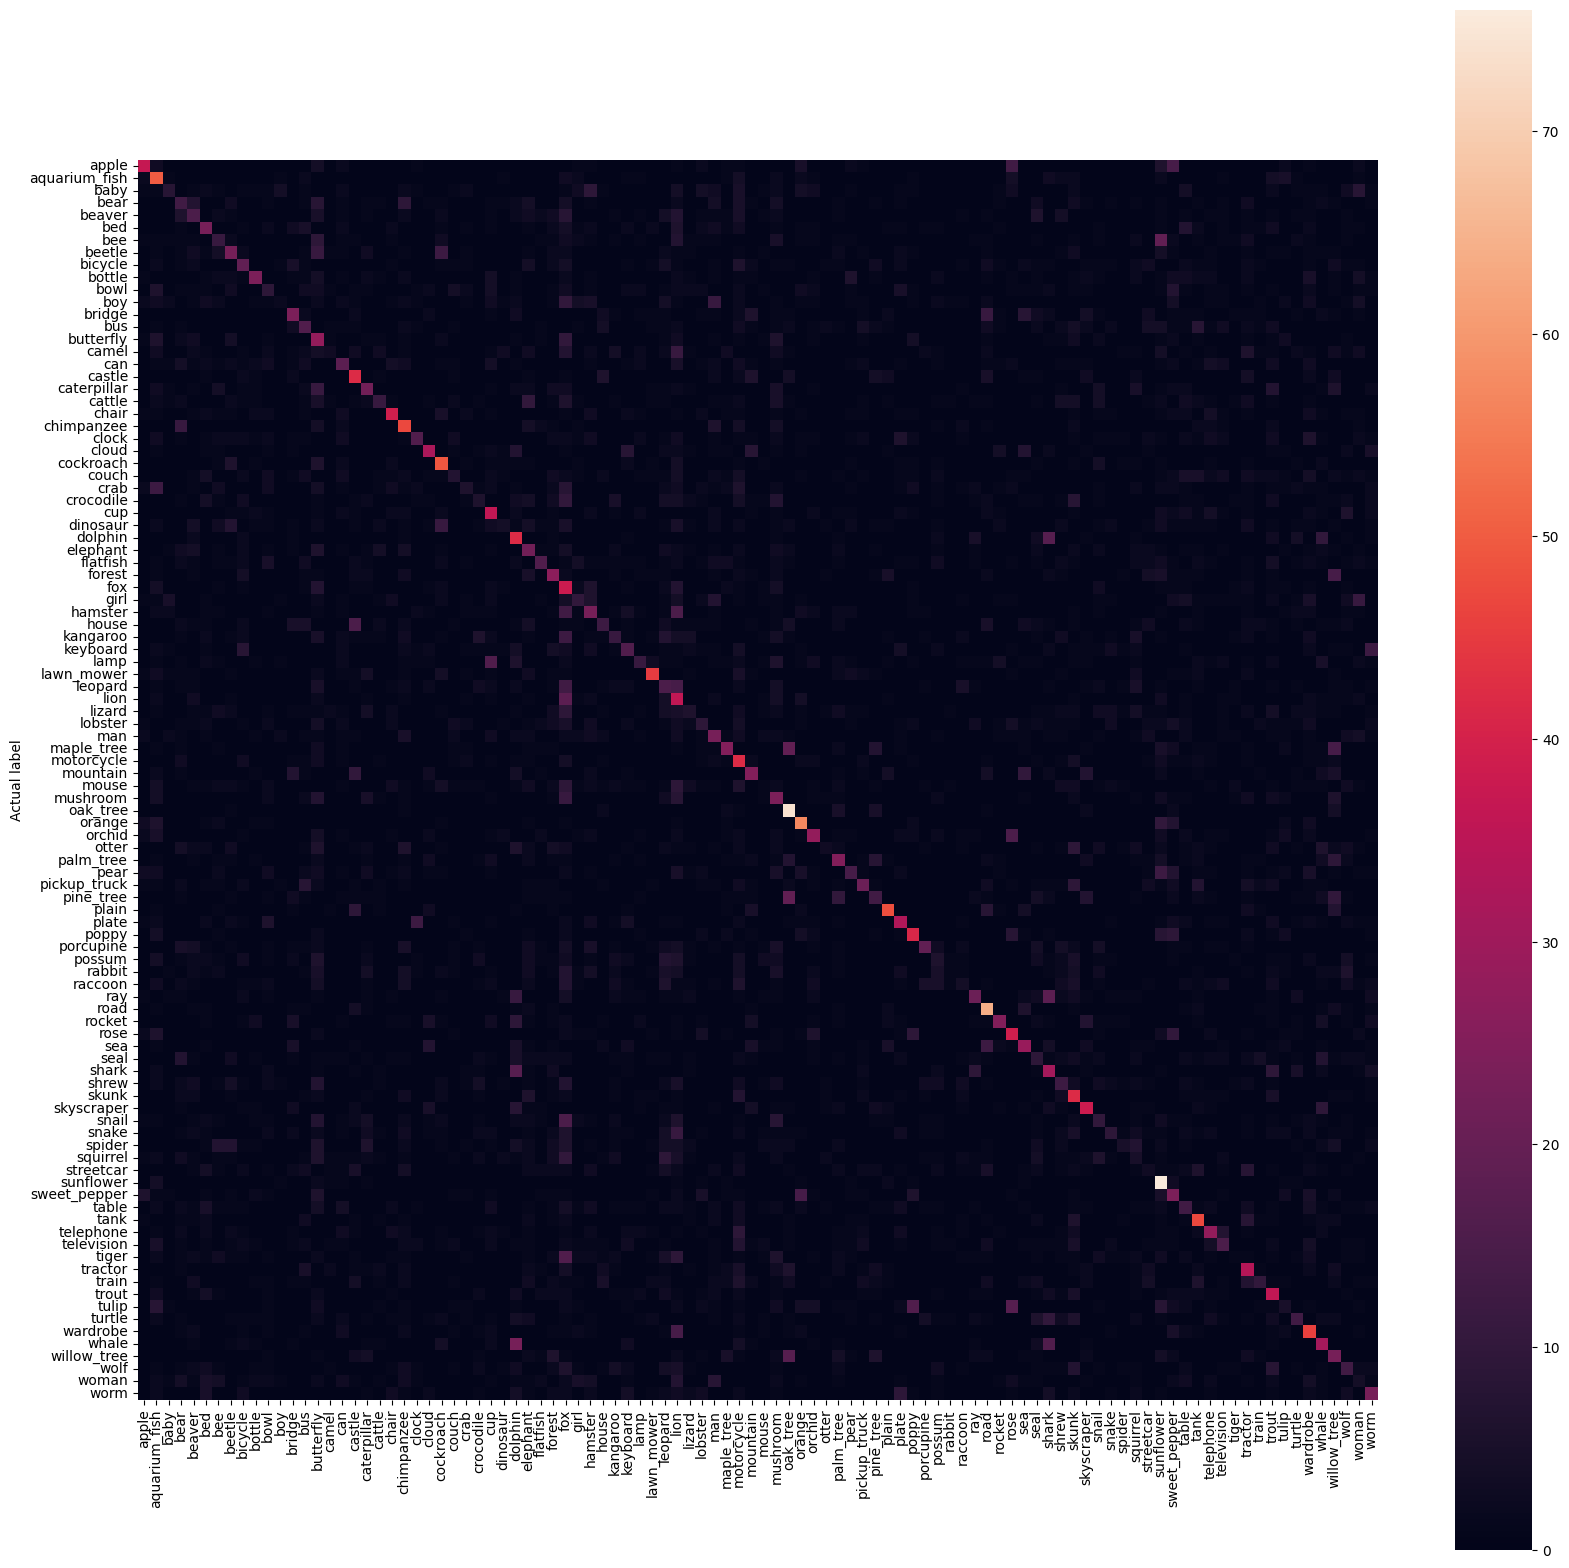

In [25]:
print('El accuracy score de la red neuronal es  ' + str(round(accuracy_score(y_validation, prediction_nn),3)))

print('El f1 score de la red neuronal es  ' + str(round(f1_score(y_validation, prediction_nn, average='macro'),3)))

print('El recall score de la red neuronal es  ' + str(round(recall_score(y_validation, prediction_nn, average='macro'),3)))

print('El precision score de la red neuronal es  ' + str(round(precision_score(y_validation, prediction_nn, average='macro'),3)))

print('La matriz de confusión de la red neuronal es:  ')

plt.figure(figsize=(20,20))
sns.heatmap(confusion_matrix(y_validation,prediction_nn), square = True, annot=False,xticklabels= labels, yticklabels=labels)
plt.ylabel('Actual label')
plt.show();

**Los scores son practicamente similares a los de accuracy, por lo que es el modelo que mejor resultado nos ha dado.**

Detallamos los scores de cada clase:

In [27]:
print(classification_report(y_validation_t, prediction_nn, target_names = labels))

               precision    recall  f1-score   support

        apple       0.49      0.37      0.42       100
aquarium_fish       0.24      0.50      0.32       100
         baby       0.25      0.08      0.12       100
         bear       0.12      0.13      0.12       100
       beaver       0.15      0.15      0.15       100
          bed       0.21      0.23      0.22       100
          bee       0.13      0.11      0.12       100
       beetle       0.23      0.23      0.23       100
      bicycle       0.20      0.19      0.19       100
       bottle       0.40      0.24      0.30       100
         bowl       0.11      0.09      0.10       100
          boy       0.12      0.02      0.03       100
       bridge       0.27      0.24      0.25       100
          bus       0.17      0.16      0.16       100
    butterfly       0.11      0.28      0.16       100
        camel       0.16      0.03      0.05       100
          can       0.20      0.18      0.19       100
       ca

### <a name="randomlbp"> 5.3. Random forest sobre el histograma del LBP (Extra) <a>

En este apartado entrenaremos un modelo Random Forest, **utilizando la técnica de _Local Binary Patterns_**, para ello haremos uso de las funciones del articulo  _"Local Binary Patterns with Python & OpenCV" by Adrian Rosebrock"_ que podemos encontrar  [aquí](https://pyimagesearch.com/2015/12/07/local-binary-patterns-with-python-opencv/)

Importamos las librerias necesarias para trabajar con LBP:

In [8]:
#Importamos las librerias necesarias para trabajar con LBP.
from skimage import feature
import numpy as np
from imutils import paths
import argparse
import cv2
import os

Definimos la función LBP:

In [9]:
class LocalBinaryPatterns:
	def __init__(self, numPoints, radius):
		# store the number of points and radius
		self.numPoints = numPoints
		self.radius = radius
	def describe(self, image, eps=1e-7):
		# compute the Local Binary Pattern representation
		# of the image, and then use the LBP representation
		# to build the histogram of patterns
		lbp = feature.local_binary_pattern(image, self.numPoints,
			self.radius, method="uniform")
		(hist, _) = np.histogram(lbp.ravel(),
			bins=np.arange(0, self.numPoints + 3),
			range=(0, self.numPoints + 2))
		# normalize the histogram
		hist = hist.astype("float")
		hist /= (hist.sum() + eps)
		# return the histogram of Local Binary Patterns
		return hist

Definimos el tamaño de la imagen y creamos listas vacias para incluir los datos de test y validación convertidos

In [56]:
# initialize the local binary patterns descriptor along with
# the data and label lists
desc = LocalBinaryPatterns(32, 8)
data_t = []
data_v = []

Pasamos las imágenes del set de training a blanco y negro, para posteriormente almacenar sus características en la lista `data_t`

In [57]:
# loop over the training images
for image in X_train :
	# load the image, convert it to grayscale, and describe it
	gray = cv2.cvtColor(image.astype('float32'), cv2.COLOR_BGR2GRAY)
	hist = desc.describe(gray)
	#Update the data list
	data_t.append(hist)

Pasamos las imágenes del set de validación a blanco y negro, para posteriormente almacenar sus características en la lista `data_v`

In [58]:
# loop over the test images
for image in X_validation :
	# load the image, convert it to grayscale, and describe it
	gray = cv2.cvtColor(image.astype('float32'), cv2.COLOR_BGR2GRAY)
	hist = desc.describe(gray)
	#Update the data list
	data_v.append(hist)

Convertimos en array las listas anteriores:

In [60]:
x_train_t = np.array(data_t)
x_validation = np.array(data_v)

Optimizamos el modelo RandomForest con los datos de training:

In [17]:
clf = RandomForestClassifier(n_estimators=25)
clf.fit(x_train_t, y_train)

RandomForestClassifier(n_estimators=25)

Realizamos la predicción de los valores de validación:

In [18]:
#Realizamos la predicción de los valores.
prediction_lbp = clf.predict(x_validation)

Obtenemos los scores:

El accuracy score del modelo Random Forest sobre el histograma del LBP es 0.069
El f1 score del modelo Random Forest sobre el histograma del LBP es 0.064
El recall score del modelo Random Forest sobre el histograma del LBP es  0.069
El precision score del modelo Random Forest sobre el histograma del LBP es  0.065
La matriz de confusión del modelo Random Forest sobre el histograma del LBP es:  


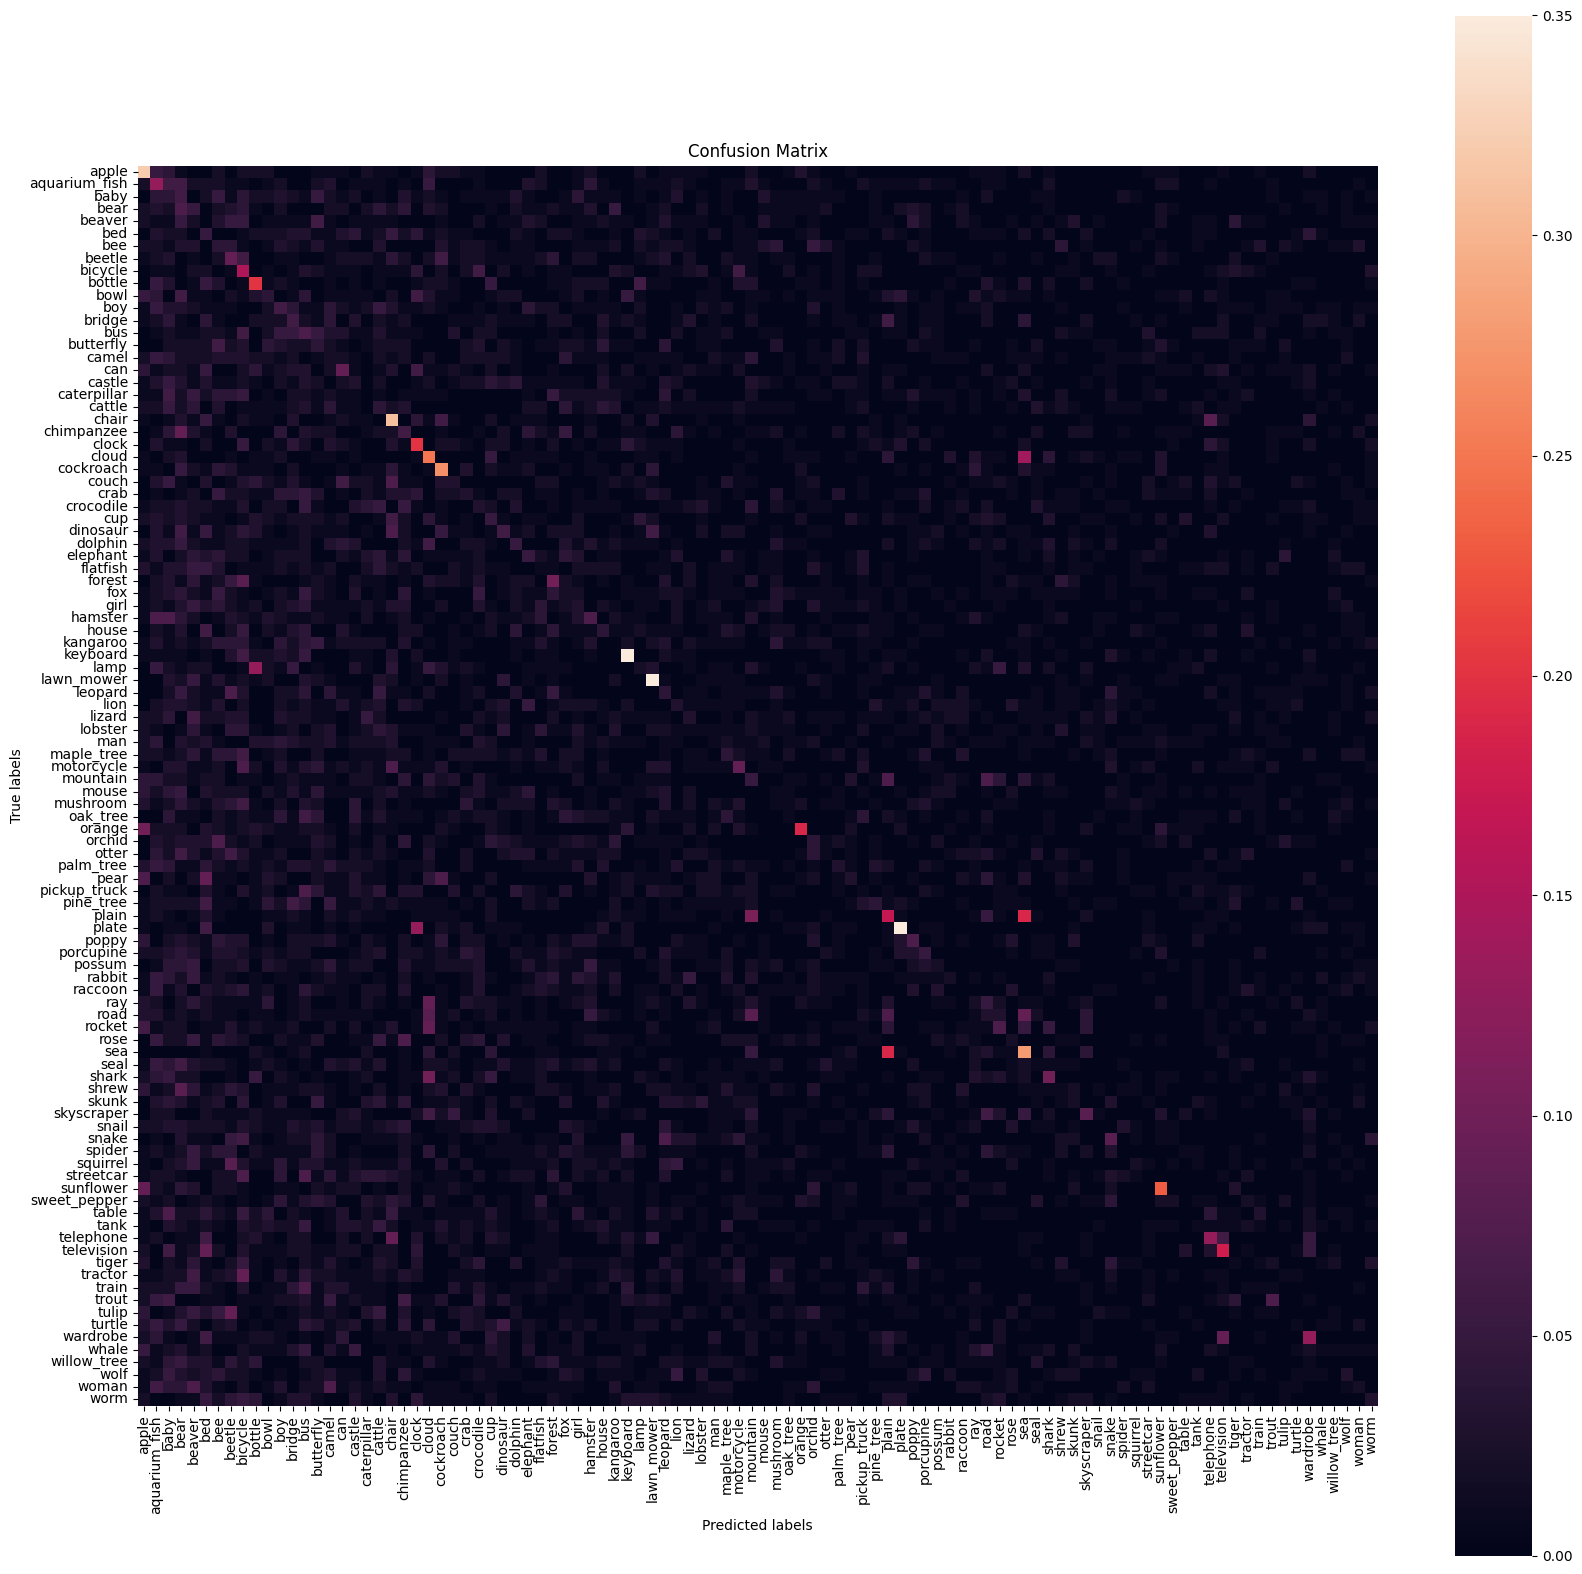

In [19]:
print('El accuracy score del modelo Random Forest sobre el histograma del LBP es ' + str(round(accuracy_score(y_validation, prediction_lbp),3)))

print('El f1 score del modelo Random Forest sobre el histograma del LBP es ' + str(round(f1_score(y_validation, prediction_lbp, average='macro'),3)))

print('El recall score del modelo Random Forest sobre el histograma del LBP es  ' + str(round(recall_score(y_validation, prediction_lbp, average='macro'),3)))

print('El precision score del modelo Random Forest sobre el histograma del LBP es  ' + str(round(precision_score(y_validation, prediction_lbp, average='macro'),3)))

print('La matriz de confusión del modelo Random Forest sobre el histograma del LBP es:  ')

from matplotlib.axis import Axis
plt.figure(figsize=(20,20))
sns.heatmap(confusion_matrix(y_validation, prediction_lbp,normalize='true'), square = True, annot=False,xticklabels= labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.show();

**El score de 6.9% es más bajo que modelos realizados anteriormente en otros apartados. Por lo que no le seleccionariamos para calcular las predicciones.**

### <a name="redlbp"> 5.4. Una red neuronal sobre el histograma del LBP (Extra) <a>

In [62]:
# capas de la red
input = Input(shape=(34)) #Según tamaño de la imagen y formato rgb
input_flat = layers.Flatten()(input)
layer = layers.Dense(units=100, activation='elu')(input_flat)
layer = layers.Dense(units=70, activation='elu')(layer)
layer = layers.Dense(units=50, activation='elu')(layer)
layer = layers.Dense(units=40, activation='elu')(layer)
output = layers.Dense(units=100, activation='sigmoid')(layer)

# creamos el modelo
model = Model(inputs=input, outputs=output)
print(model.summary())

# optimizador
optimizer = SGD(learning_rate=0.01)

# función loss
loss = SparseCategoricalCrossentropy(from_logits=False) #lo usamos porq es clasificacion

# métrica
metrics = ['accuracy']

# compilamos el modelo
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Optimizamos el modelo
model.fit(x=x_train_t, y=y_train, batch_size=10, epochs=20,validation_data=(x_validation, y_validation))

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 34)]              0         
                                                                 
 flatten_11 (Flatten)        (None, 34)                0         
                                                                 
 dense_43 (Dense)            (None, 100)               3500      
                                                                 
 dense_44 (Dense)            (None, 70)                7070      
                                                                 
 dense_45 (Dense)            (None, 50)                3550      
                                                                 
 dense_46 (Dense)            (None, 40)                2040      
                                                                 
 dense_47 (Dense)            (None, 100)               4100

In [63]:
# Pasamos el formato de las predicciones para obtener los scores
prediction_nn_lb = model.predict(x_validation)
prediction_nn_lb = np.argmax(prediction_nn_lb, axis=-1)

313/313 [==============================] - 1s 2ms/step


El accuracy score de la red neuronal es  0.037
El f1 score de la red neuronal es  0.016
El recall score de la red neuronal es  0.037
El precision score de la red neuronal es  0.027
La matriz de confusión de la red neuronal es:  


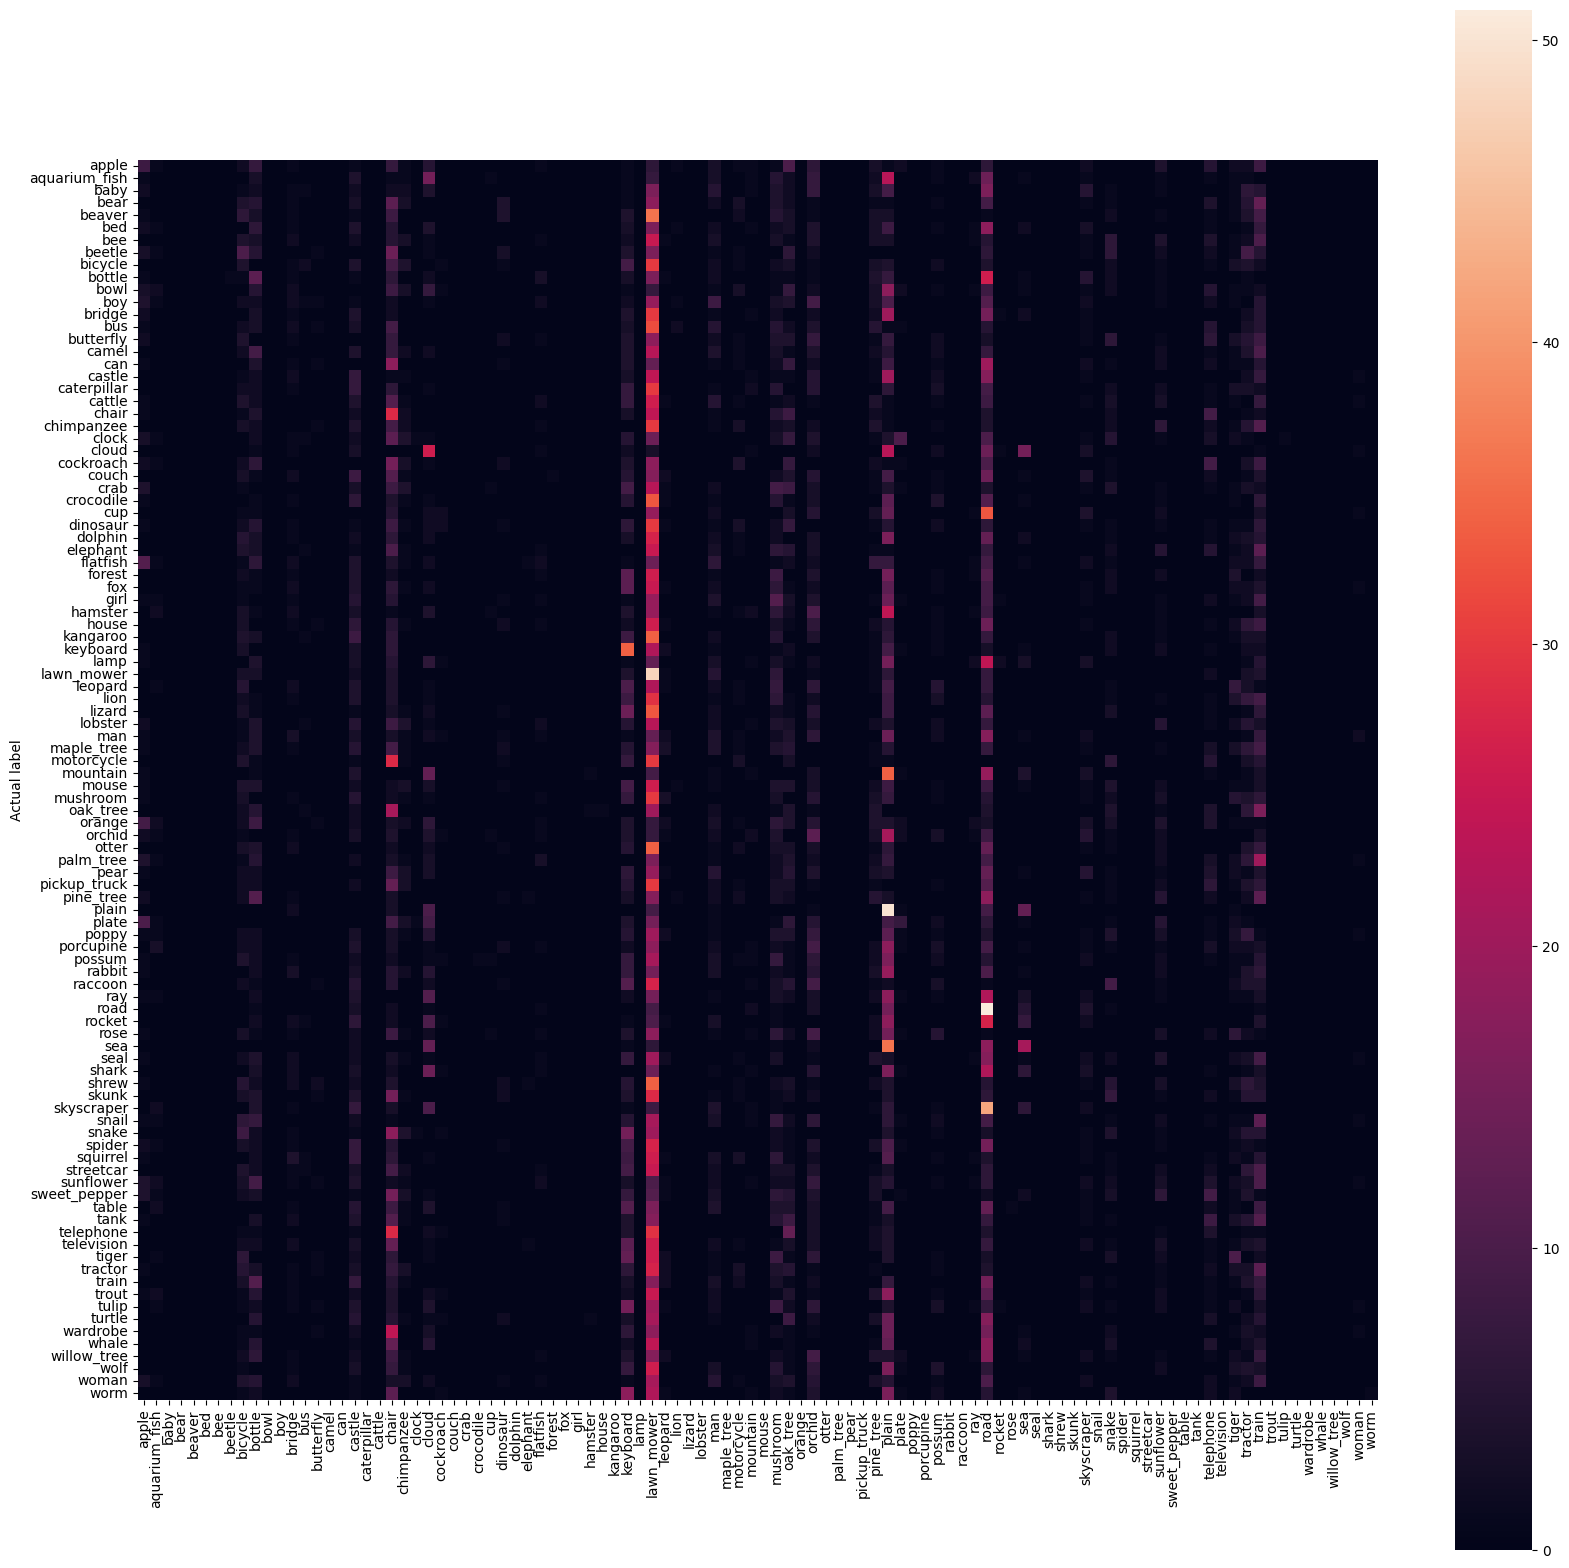

In [64]:
print('El accuracy score de la red neuronal es  ' + str(round(accuracy_score(y_validation, prediction_nn_lb),3)))

print('El f1 score de la red neuronal es  ' + str(round(f1_score(y_validation, prediction_nn_lb, average='macro'),3)))

print('El recall score de la red neuronal es  ' + str(round(recall_score(y_validation, prediction_nn_lb, average='macro'),3)))

print('El precision score de la red neuronal es  ' + str(round(precision_score(y_validation, prediction_nn_lb, average='macro'),3)))

print('La matriz de confusión de la red neuronal es:  ')

plt.figure(figsize=(20,20))
sns.heatmap(confusion_matrix(y_validation,prediction_nn_lb), square = True, annot=False,xticklabels= labels, yticklabels=labels)
plt.ylabel('Actual label')
plt.show();

Los scores de la red neuronal sobre el histograma LBP han sido bastante bajos, coun un **accuracy 3.7%**,  por lo que tampoco lo tendríamos en cuenta para predecir tipos de imagenes.

### <a name="conclusiones"> 6. Conclusiones Generales <a>

- **Tras la realización de diferentes arquitecturas de redes neuronales y puestas en funcionamiento, la red con el score más alto contaba con la siguiente arquitectura: activador 'elu' en las 4 capas intermedias, un batch size de 10 y epoch de 20.**


- **Incrementando  el número de neuronas y batch size, concluimos que a mayor número de neuronas, es posible conseguir un mayor score (hasta cierto número de neuronas donde se queda estancado), y que a mayor número de batch size, el score disminuye en proporción.**


- **El estudio de la aplicación de diferentes modelos de Machine Learning como RandomForest y Árboles de decisión han demostrado que al menos en las pruebas realizadas, no han conseguido superar el score de nuestra red neuronal.**


- **Finalmente, hemos podido aplicar el histograma LBP a un modelo RandomForest y a una red neuronal, sin embargo, los scores conseguidos son irrelevantes, por lo que descartamos la aplicación de estos modelos.**

[Ir arriba del documento](#top)